# Astronomy 501: Modern Astronomical Techniques

# Module 1: Review of Math and Statistics (WN2024)


Associated Reading: [Sutton Chapter 4](https://www-cambridge-org.proxy.lib.umich.edu/core/services/aop-cambridge-core/content/view/954DB65F0893EA1D89770E8AA2C4AE26/9780511862335c4_p52-65_CBO.pdf/fourier-transforms.pdf)

Associated Reading: [Lena Appendices A & B](https://link-springer-com.proxy.lib.umich.edu/content/pdf/bbm%3A978-3-642-21815-6%2F1.pdf)

# Topics covered
    1. Probability, Random Variables, Expectation Values and Moments
    2. Covariance and Correlation
    3. Convolution
    4. Fourier Analysis
    5. Power spectrum (aka spectral density)

# Learning Goals
1. A good understanding of random variables, PDFs, and how to utilize them in Python.

# 1. Probability, Random Variables, Expectation Values and Moments

## Probability Distributions

#### 
 What is the family of statistics that represents dice throws (or coin flips, or basketball , etc)?
 
....the binomial distribution.
    
As an example, on November 25, 2015 the New England Patriots had won 19 out of the previous 25 coin tosses. 

Find the probability of winning a series of m = 19 (fair) coin tosses out of N = 25 attempts using the binomial distribution:

\begin{equation}
P(m|N,p)_{Binomial}=\frac{N!}{m!(N-m)!}p^m(1-p)^{N-m}.
\tag{1.1}
\end{equation}


##### 
In the limit where $p\ll 1$ and $N$ is large, we obtain the Poisson probability distribution function (PDF). Typically, we use $N > 100$ and $Np <10$ as the limit where the binomial becomes the Poisson distribution (often using a new variable $\lambda$=Np).

\begin{equation}
P(m|N,p\rm{\ or\ } \lambda)_{Poisson} = \frac{(\lambda)^me^{-\lambda}}{m!},\ p\ll 1.
\label{eq:poisson_pdf}\tag{1.2}
\end{equation}

What are some typical p's in equation 1.1 <!---\ref{eq:binomial_pdf}--> for random variables (like coins, 6/10/20 sided dice, etc)? 

What are some good examples of where the Poisson distribution eq (2) <!---\ref{eq:poisson_pdf}--> would apply?

Other examples of where the Poisson distribution is important: 

    -The number of Airbus 330 aircraft engine shutdowns per 100,000 flight hours. 
    -The number of asthma patient arrivals in a given hour at a walk-in clinic. 
    -The number of work-related accidents over a given production time.
    

### 
    Exercise 1.1.1 Random Numbers

Investigate numpy's [random](https://numpy.org/doc/stable/reference/random/index.html#module-numpy.random) and [Random Generator](https://numpy.org/doc/stable/reference/random/generator.html)

1. Explore some of the available distributions.
2. Make a vector of randomly drawn nunbers from your favorite distribution.
3. Plot that vector of data using numpy's [histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html#numpy-histogram).
4. How many random "draws" do you need (i.e., the length of your vector) to make a nice histogram?


#### 
    Answer

How do we move the bins around using plt.hist?

### 
    Example 1.1.A Animate a Poisson/Binomial

#### 
1. We will make an animation of a binomial and a Poisson distribution where the mean is increasing.
2. We will start with a p=0.5.
3. We will compare the shapes as the mean increases and probability decreases.


In [31]:
# animation function. This is called sequentially and N increases 
#each time to make a new frame (mpeg)
def drawframe(N):
    np.random.seed(10)
    #draw a sample of size = size from a binomial distribution 
    #with n,p and make a histogram
    size = 100
    p = 0.1 #a fair coin
    sample = np.random.binomial(N, p, size)
    bins = np.arange(0,60,1)    
    heights, edges = np.histogram(sample, bins=bins,density=True) 
    #Note density=True returns normalized PDF
    left_edges = edges[:-1]
    right_edges = edges[:]
    centers = (left_edges + right_edges[0:len(right_edges)-1])/2.0
    y1 = heights
    x1 = centers
    line1.set_data(x1, y1)

    #draw a sample of size = size from a poisson distribution 
    #(lambda = np) and make a histogram
    sample = np.random.poisson(N*p,size)
    bins = np.arange(0,60,1)    
    heights, edges = np.histogram(sample, bins=bins,density=True)
    left_edges = edges[:-1]
    right_edges = edges[:]
    centers = (left_edges + right_edges[0:len(right_edges)-1])/2.0
    y2 = heights
    x2 = centers
    line2.set_data(x2, y2)
    text1 = 'p = {:.2f}'.format(p)
    text2 = 'mean = {:.0f}'.format(N*p)
    txt_title.set_text(text1 + ', ' + text2)
    #Also show the mean (which is same for both)
    line3.set_data([N*p,N*p], [0,1])

    return (line1,line2,line3)

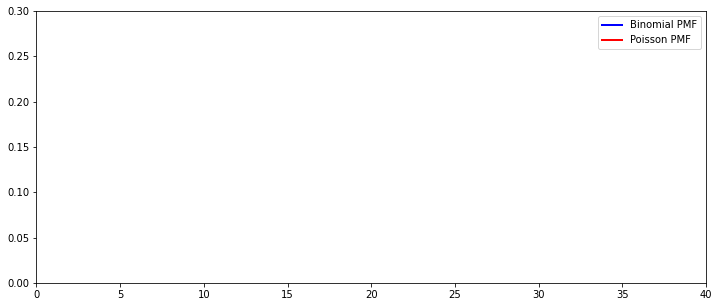

In [32]:
#This sets up a blank frame (which you can see)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,1,1)   

# set up the axis limits as needed
ax1.set_xlim(( 0, 40))            
ax1.set_ylim((0, 0.3))
# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2,label='Binomial PMF')     
# ax.plot returns a list of 2D line objects
line2, = ax1.plot([], [], 'r', lw=2,label='Poisson PMF')     
# ax.plot returns a list of 2D line objects
line3, = ax1.plot([], [], 'b',linestyle='-.', lw=2)
ax1.legend()

In [33]:
from matplotlib import animation

To make this library work, you need ffmpeg installed on your system (or module load ffmpeg on Greatlakes)

When you START your notebook from the browser, provide "load ffmpeg" in the modules option area.

You will also need to know the path of the ffmpeg executable on Greatlakes.

You can search for this executable in many different ways (after the module is loaded). For instance, log into a node (via ssh) and type "module load ffmpeg" and then "which ffmpeg"

You also need the python module ffmpeg-python installed (e.g., via pip)

From your running notebook, you can do:

import sys

!{sys.executable} -m pip install --user ffmpeg-python

In [34]:
plt.rcParams['animation.ffmpeg_path'] = '/sw/pkgs/coe/o/ffmpeg/6.0.0/bin/ffmpeg' 
anim = animation.FuncAnimation(fig, drawframe, frames=100, 
                               interval=100, blit=True)

In [35]:
#This is like %matplotlib inline, but for animations using html5
from matplotlib import rc
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [36]:
anim

### 
    Exercise 1.1.2 When does a Binomial become a Poisson?

1. Change the Binomial above such that it looks nearly identical to the Poisson. 

## The Mean

######    

We define the arithmetic average of a distribution via:

\begin{equation}
f_{avg} = \frac{1}{{b - a}}\int_{{\,a}}^{{\,b}}{{f\left( x \right)\,dx}}
\label{eq:int_average} \tag{1.3}
\end{equation}

However, there is a <i>different</i> mean used when dealing with statistical probability distributions. If the probability distribution $\phi$ is continuous, we define:
$$
\phi_{mean} = \int x \phi(x) dx 
$$
 
In a discrete probability distribution where $p(m)$ exists for every $m$, we have
$$\mu=\sum\limits_i m p(m)$$

The above looks more like a "weighted mean" compared to equation 1.3.
Let's calculate it for a Poisson:


$$ = \sum\limits_i m\frac{\lambda^me^{-\lambda}}{m!}$$

$$ = \sum\limits_i \frac{\lambda^me^{-\lambda}}{(m-1)!}$$

$$ = \sum\limits_i \frac{\lambda\lambda^{(m-1)}e^{-\lambda}}{(m-1)!}$$

$$ = \lambda e^{-\lambda}\sum\limits_i \frac{\lambda^{(m-1)}}{(m-1)!}$$

$$ = \lambda $$ using the Taylor expansion of $e^{\lambda}$.

This brings us to the idea of <i> statistical moments </i>.

## Statistical Moments (aka Expectation Values)

#### 

$$\langle x^n \rangle  = \rm{E(x^n)} = \int_{-\infty}^{\infty} x^n \phi(x) dx
\label{eq:moments} \tag{1.4}$$

where $\langle x^n \rangle  = {\rm E(x^n)}$ is defined as the expectation value. n = 1,2,3 are the first, second, third, etc moments. 

The first moment is just the (PDF) weighted mean (see above example). 

<i> Centered moments </i> are higher moments shifted to this mean: $\mu^n = \langle (x - \langle x \rangle )^n \rangle$

An important centered moment is for n = 2: $\mu^2 = \langle (x - \langle x \rangle )^2 \rangle$. What do we call this?


We define the above as the <i>variance</i>, which is the square of the spread about the mean. One can easily show that:

$$\mu^2 = E(x^2) - (E(x))^2$$

One can use the above techniques to calculate the variance about the mean of the <i>Poisson Distribution</i> and find:

$$\mu^2 = \sigma^2 = \lambda$$

where we have switched to the more common variance label, $\sigma^2$. It is interesting that the variance in a Poisson distribution has the same value is its mean.

If you have evidence that your data were generated through a Poisson process (or you measure a Poisson process), you will often see means and errors quoted as $m \pm{\sqrt{m}}$ (e.g. photon counting with $m$ counts).

The third moment, called the skewness, $⟨x^3⟩$, characterizes the simplest asymmetry, while the fourth moment, the kurtosis, $⟨x^4⟩$, characterizes the flatness of the distribution. And so on.


To completely identify the law of random variable $𝑋$ we just need to know the population moments (HW).

### 
    Exercise 1.1.3 Random Variables

Investigate scipy's [stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library. 


1. How is this library different from numpy.random in terms of distributions?
2. Make a vector of randomly drawn nunbers from your favorite DISCRETE distribution.
3. Plot that vector of data using numpy's [histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html#numpy-histogram).
4. How many random "draws" do you need (i.e., the length of your vector) to make a nice histogram?

#### 
    Answer

### 
    Exercise 1.1.4 Discrete Moments

1. Write two functions: one to calculate a mean and the other to calculate a variance. 
2. The functions should take TWO inputs: a vector of numbers and a scipy.stats DISCRETE distribution.
3. The functions should use direct summation.
4. Exercise your functions on a BINOMIAL and a POISSON distribution. 
5. Compare your means and variances to the ones directly provided in the stats object. 

#### 
    Answer

## Continuous versus Discrete Distributions

There is a difference between a probability MASS function (PMF) versus a probability DENSITY function (PDF).

So while the binomial has a PMF, the Gaussian (which is continuous) only has a PDF. 

PMFs are directly probabilities. PDFS are NOT. Both are confusingly called Probability Distributions.

Some rules for PDFs:
- $\phi(x) ≥ 0$ for all x: probabilities are always positive.
- $\displaystyle\int_{L_b}^{L_t} \phi(x) dx =1$ 

    X must take on some value within its permissible range. Often this range is all of the real line, with $L_b =  −\infty$ and $L_t = \infty$; but sometimes not.

- The usual notation for a random variable X being distributed with a pdf $\phi$
is $X ∼ \phi$. Note that for a continuous random variable $X$, $Pr[X = x] = 0$ for
all $x$: there is zero probability of X being exactly equal to any value.



Thus the importance of the CDF, $\Phi$: the <b>cumulative distribution function</b>, which IS a probability, but you must interpret it correctly. 

$$ \Phi(x) = \displaystyle\int_{L_b}^{x} \phi(x) dx =  P[L_b ≤ X ≤ x]$$

and thus that

$$\phi(x) = \frac{d\Phi(x)}{dx} $$

The CDF also allows us to introduce what are called the quantiles of the distribution. Because $\Phi$ must be monotonically increasing, it has an inverse $\Phi^{−1}$. If the quantile value is $q$, the associated value of $x$ is $x(q) = \Phi^{−1}(q)$.

For example, the <i> median </i> is defined as $q=1/2$.

A PDF doesn't itself give probabilities, but relative probabilities; continuous distributions don't have point probabilities. To get probabilities from PDFs you need to integrate over some interval - or take a difference of two CDF values.

How do you use PDFs to calculate moments? Just like PMFs.

### 
    Exercise 1.1.5 Continous Moments

####  

1. Re-code your two functions (from Exercise 1.3) to be for CONTINUOUS distributions. 
2. Exercise your functions the same was as above for a Gaussian.

## Random Variables and Samples

A random variable is a potential outcome of an experiment or population, what we call a ‘data point’. Some obvious examples include the observed magnitude and the inferred redshifts or even categories like stars versus galaxies.  Other examples include intensity as a function of sky location, wavelength, or of time. 

In the example above, we drew a random variable from an underlying PDF (or PMF) using the <i> rvs </i> method of the stats distribution (e.g., stats.binom.rv)

So think about this carefully: it means that our measurement of the data should come from a <i> first principle </i> distribution (PDF/PMF). If we do not know what the PDF/PMF is, we have no hope of meaningfully calculating moments (or doing any statistical inference or basically any science).

For instance, a <i> Poisson process</i> is a non-deterministic process where events occur continuously and independently of each other. Poisson statistics (aka the <i> Poisson distributions</i>) are applicable when counting independent, random events which occur, when measured over a long period of time, at a constant rate. The Poisson distribution is therefore applicable to the counting of photons from astronomical sources, the counting of photons from the sky, or the production of thermally-generated electrons in a semi-conductor (i.e. dark current).

In terms of notation, the lower case $x$ represents a fixed number from some underlying possibilities (i.e., the real line or any integer from 0 to $\infty$). Captital $X$ represents the outcome of a functon, operation or process, such as a Poisson distribution function. Particular realizations of a random variable are written in corresponding lower case letters. For example $x_1, x_2,\cdots, x_n$ could be a sample corresponding to the random variable $X$ and a cumulative probability is formally written $P(X>x$) to differentiate random variable from realization.

<i>Capital X is a random variable and lowercase x is a specific value the random variable can take. So P(X=x) is the probability that the random variable takes the value x.</i>

### 
    Example 1.1.B Sampling from a PMF/PDF

####  
1. Create a vector of 100 draws from a binomial distribution with mean 10 and p=0.2
2. Using those data, calculate (by hand) the probability of getting the x=2.
3. Run this calculation multiple times. Do you get the same answer each time? Why not?

In [23]:
from scipy import stats
X = stats.binom(10, 0.2)
vector = X.rvs(100)
print(vector) #A series of 100 random variables.
print('Frequency of x=2: ', len(vector[vector==2])/len(vector))

[1 3 3 1 2 1 1 2 1 3 1 3 0 2 3 1 0 2 3 2 1 2 3 1 5 3 2 2 2 2 1 1 3 2 3 2 3
 5 2 3 3 2 2 3 3 1 3 1 3 3 4 3 3 4 2 3 1 2 2 0 3 2 0 1 1 2 4 3 1 2 3 5 0 2
 3 3 1 0 2 3 3 0 2 2 5 1 0 2 3 0 1 2 4 1 1 2 3 2 2 2]
Frequency of x=2:  0.31


<b>Recap</b>: in frequency distribution, sample space consists of variables and their <i> frequencies of occurrence</i>. In probability distribution, sample space consists of <i>random variables and their probabilities</i>.

## Combining Moments

So what is $E(X + Y)$ for a discrete case where $p(m)$ exists? In other words, what is the average value (weighted) of the sum of two random variables (aka: rolling two dice and adding up the result).

Well, as long as those draws are independent

\begin{align*} 
		E(X+Y) &= \sum_{x} \sum_{y} (x+y) p(x, y)\\ 
		&= \sum_{x} \sum_{y}\left(x p(x, y) + y p(x, y)\right)\\ 
		&= \sum_{x} \sum_{y} x p(x, y) + \sum_{x} \sum_{y} y p(x, y)\\ 
		&= \sum_x x \sum_y p(x,y) + \sum_y y \sum_x p(x,y) {\rm\ by\ rule\ of\ double\ sums}\\ 
		&= \sum_x x p_X(x) + \sum_y y p_Y(y) {\rm\ and\ joint\ probabilities} \\ 
        &= E(X) + E(Y) 
\end{align*}
so that the expectation of the sum of random variables is the sum of the expectations of each. 

### 
    Example 1.1.C Expectation of a Sum of Random Variables

#### 
1. Make two random variables: one for a Gaussian and one for a Binomial
2. Using draws from those Probility Functions, show that E[X+Y] = E[X] + E[Y]

In [36]:
from scipy import stats
#The mean of the data generated from a Poisson or Gaussian versus the mean of the expectations of the PDFs:
X = stats.binom(10, 0.2)
X1 = X.rvs(100)
print(np.mean(X1),'X = Binomial np=2') 
Z = stats.norm(4, 1) 
Z1 = Z.rvs(100)
print(np.mean(Z1),'Z = Gaussian mean = 4 and stdev = 1') 
#Compare the RVS to the input means
print('E[X+Z]= ',np.mean([X1+Z1]))
print('E[X] + E[Z] = ',np.mean(X1) + np.mean(Z1))


1.91 X = Binomial np=2
3.9742777567974765 Z = Gaussian mean = 4 and stdev = 1
E[X+Z]=  5.884277756797476
E[X] + E[Z] =  5.884277756797476


## Sample Statistics

   Suppose you want to find the average height of all humans. You could randomly select two people from the entire world and make an estimate. You could also collect data for everyone in the entire world, except ONE person, and calculate the average. Which average would you bet on as being closer to the true mean of the entire human population?

If your sample includes everyone except one person, even if the person you didn’t include is very tall or very short, the average height you calculate is going to be almost exactly equal to the true average. If your sample only includes two people, there’s a pretty good chance that the average could be very different from the truth.

A <i>sampling distribution</i> is built from taking many samples of size N from a population and calculating the sample statistic, e.g., the mean height, for each sample.

You next make a new measurement of that same property FOR THE SAME SIZE SAMPLE as used to build your sample distribution. You can compare to the sampling distribution, which is DEFINED as your <i>null hypothesis</i>.

<b>The sampling distribution is important because the likelihood of the sample statistic that you calculated depends on the size of the sample you are using.</b>

This leads us to the <i> sample mean </i>:

$$
E(\bar{X}) = E\Bigg( \frac{\sum_m X_m}{m}\Bigg) = \frac{1}{m}m\ E(X) = E(X)
 \tag{1.5}
$$

Observed data can be viewed as the values of a collection of independent identically distributed random variables. The sample mean (or sample expectation) is defined as the expectation of the data with respect to the empirical distribution for the observed data. <i> This makes it simply the arithmetic average of the data</i>. 
    
The sample mean $\bar{X}$ is an unbiased estimate of the expected value of the distribution that all $X_i$ follow.
    
This is a very important result, since we can work with means of the data (i.e., time averages of photon counts) as opposed to individual data points. While we do not care about the indivdual data PDFs, there is a PDF of the sample as a whole which governs the data (and its mean).

What about the sample's second moment...the sample variance?

$$
\mu^2_{\bar{X}} = \rm{E}\Bigg[\Bigg( \frac{\sum_m X_m}{m}\Bigg)^2\Bigg]= \frac{1}{m^2}m{E(X^2)} = \frac{E(X^2)}{m} = \frac{\mu^2_X}{m}
 \tag{1.6}
$$

The standard deviation of the sample mean is often called the standard error of the mean. Notice below that the variance here is both (a) centered and (b) the mean of the centered variances:

### 
    Example 1.1.D Variance of a Sum or Random Variable Variances

#### 
1. Make two random variables: one for a Gaussian and one for a Binomial
2. Using draws from those Probability Functions, so that E[X$^2$+Y$^2$] = $\frac{E[X^2] + E[Y^2]}{2}$

In [3]:
from scipy import stats
#The mean of the data generated from a Poisson or Gaussian versus the mean of the expectations of the PDFs:
X = stats.binom(10, 0.2)
X1 = X.rvs(10000)
print(np.var(X1),' var= ', X.var()) 
Z = stats.norm(X.mean(), X.std()) # Declare A to be a normal random variable
Z1 = Z.rvs(10000)
print('var [X,Z]= ',np.var([X1-np.mean(X1),Z1-np.mean(Z1)]),' var= ', X.var())

print()
print('Z has a mean and stdev twice of X')
#The mean of the data generated from a Poisson 
Z = stats.norm(2*X.mean(), np.sqrt(2*X.var())) # Declare A to be a normal random variable
Z1 = Z.rvs(10000)
print('var [X,Z]= ',np.var([X1-np.mean(X1),Z1-np.mean(Z1)]), 
      '; mean [E(X^2),E(Z^2)]= ', (X.var()+Z.var())/2.0)
print()

print('Z has a mean ten times X')
#The mean of the data generated from a Poisson 
Z = stats.norm(2*X.mean(), np.sqrt(10*X.var())) # Declare A to be a normal random variable
Z1 = Z.rvs(10000)
print('var [X,Z]= ',np.var([X1-np.mean(X1),Z1-np.mean(Z1)]), 
      '; mean [E(X^2),E(Z^2)]= ', (X.var()+Z.var())/2.0)

1.60519984  var=  1.6
var [X,Z]=  1.6047781641525503  var=  1.6

Z has a mean and stdev twice of X
var [X,Z]=  2.4409925113122792 ; mean [E(X^2),E(Z^2)]=  2.4

Z has a mean ten times X
var [X,Z]=  8.836030648429915 ; mean [E(X^2),E(Z^2)]=  8.8


Under appropriate conditions, the sample mean converges (in probability or almost surely) to the expecation value of the data.

## Z-scores


The <i>Central Limit Theorem</i> states that, regardless of the shape of the population distribution, the sampling distribution of the mean approaches a normal distribution as the sample size increases.  Under appropriate conditions, the random variable $X$ converges in distribution to a standard normal distribution (i.e., a normal distribution with zero mean and unit variance). See HW and Convolution below.

This theorem is important because it allows us to make inferences about a population based on a just a "small" sample of the population. The CLT is widely used in hypothesis testing, confidence intervals, and regression analysis, among other statistical techniques (covered later).

As a result of the <i>Central Limit Theorem</i>, we can write:
$$\frac{\bar{X_n}-E(\bar{X_n})}{Var(X_n)} = \bigg(\frac{\bar{X_n}-\mu}{\sigma/\sqrt{n}}\bigg)
 \tag{1.7}
$$

In statistics, this is known as the <i> Z-score</i> which is widely used.

A Z-score is the number of standard deviations from the mean value of the reference population (a population whose known values have been recorded, like in these charts the CDC compiles about people’s weights). For example:

- A z-score of 1 is 1 standard deviation above the mean.
- A score of 2 is 2 standard deviations above the mean.
- A score of -1.8 is -1.8 standard deviations below the mean.

A z-score tells you where the score lies on a normal distribution curve. A z-score of zero tells you the values is exactly average while a score of +3 tells you that the value is much higher than average

If you are going to measure a z-score, you are going to need the <i> sample mean and variance. </i> Z-scores, also known as standard scores, are a way to standardize data and compare individual observations to the population mean. 

### 
    Example 1.1.E The Central Limit Theorem

#### 

Suppose you are measuring the brightness of a star over and over again atsome interval. You notice dips (and peaks) in the star's brightness. You wonder if those dips/peaks are significant. We do this using the CLT by measuring a mean of the star magnitudes and asking what the z-score is based on the measurement error. We then compare this to the z-score of our mean and ask whether our mean measurement is sensible. 

Start with a random samping of magnitudes (the astronomical flux measurement for optical astronomers). The measurements would provide some mean magnitude e.g. in the visual band. The data would also provide a standard deviation. This "error" could caused by all kinds of things.

Next, using equation 1.7 above, define the distance $\bar{X_n}-\mu$ at which you want to study. We will use 0.02 magnitudes as the level at which we want to constrain as an interesting dip/peak. This means that we must be able to measure the <i>mean</i> meagnitude of the star to within 0.02 magnitudes. 

1. If you make 30 magnitude measurements of the star, what is the z-score to constrain "signifcant" differences from the mean you have a standard deviation of 0.2 magnitudes.
2. What is the porobability of getting the mean that you would measure given this data? This defines your confidence threshold or limit on your detected deviations from the mean.

Answer:

$$\rm{-z_{score}} \le \bigg(\frac{\bar{X_n}-\mu}{\sigma/\sqrt{n}}\bigg) \le  \rm{z_{score}}$$

$$\rm{-z_{score}} \le \bigg(\frac{0.02}{0.2/\sqrt{30}}\bigg) \le  \rm{z_{score}}$$

We can then convert this $z_{\rm score}$ to a probability via the central limit theorem. We know that the expectation of the sum of a bunch of draws from a random variable is the mean of the individual expectations and we also know that via the CLT, everything is Gaussian. A Gaussian is a continuous distribution, so our interpretable porbability is from the CDF (not the PDF!):



In [11]:
from scipy import stats
z_score = 0.05/(0.2/np.sqrt(30))
print("z-score = ", z_score)
print("Probability of mean measurement to be accurate within 0.02 magnitudes:",stats.norm.cdf(z_score))

z-score =  1.3693063937629153
Probability of mean measurement to be accurate within 0.02 magnitudes: 0.9145482398846012


This means that with 30 measurements and with an observed standard deviation od 0.2 magnitudes of those measurements. the probability of our true mean magnitude of the star to be correct to within 0.02 magnitudes is 91.45%.

### 
    Exercise 1.1.6 Using the CLT and z-scores to define an experiment

Suppose that you designing an observing program to collect enough star brightness measurements to identify a dip/peak in magnitude above your expected limit of 0.02 magnitudes but at 95\% confidence. The question is how many measurements of the star's magnitude do you need to make (such that the standard deviation is still 0.2 magnitudes due to atmospheric "seeing" and instrumental uncertainties?

Hint: you will need to first decide whether you care about 1 or 2 sided deviations from the mean as important things. Recall that the CDF is the area under the Gaussian, but over some specified limits. 

For example, a one-side CDF which contains 95% of the area looks like this:

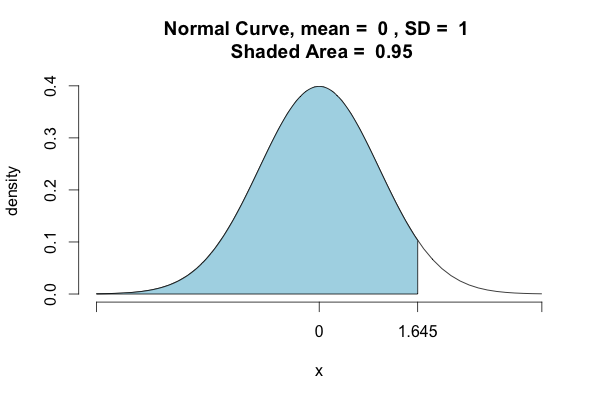

In [1]:
from IPython.display import Image
Image("one_sided_0.95.png")

While a two-side CDF which contains 95% of the area looks like this:

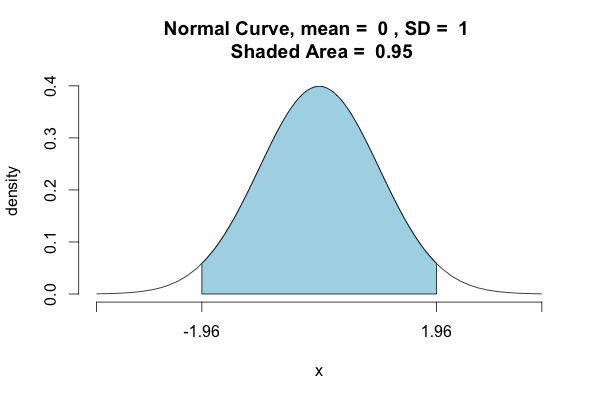

In [2]:
from IPython.display import Image
Image("two_sided_0.95.png")

The random variable object stats.norm has a method called <i>ppf()</i> which provides you with the z-score for any probability. It is the <i> inverse</i>  of the CDF. In other words, you tell it the area, and it tells you the value for x in the above plots (which is normalized to the standard deviation)---aka the z-score. However, note that <i>ppf(0)</i> is a one-tailed test (see figures above).

1. First, using the above information, what is the z-score you need which contains 95% area for detecting both dips and peaks?/
2.  How about just peaks or just valleys at 95\%? Hint: You can still use the one-tail <i>ppf()</i>, but you will need to split the 5\% left-over into two regions on each side of the Gaussian. 
2. What is the number of samples you need to define one-tailed differences from the mean to within your pre-specified (science driven) limit of 0.02 magnitues and with 95\% confidence?

### 
    Example 1.1.F Sampling Statistics and the Halo Mass Fuction

You discover 6 galaxy clusters that have a log$_{10}$ mass with respect to $200\times \rho_{crit}$ of 14.8$M_{\odot}$ and within a redshift of $z=0.1$. Assume that you have searched 1000 square degrees of the sky and are assured that there are no other clusters this massive which could possibly exist. Using sample statistics (i.e., frequency of occurance), determine the probability of finding this many clusterc of this mass in your data. What is the z-score?

1. You will need a PDF(M)/PMF(M). What is it going to be?
2. What does "mass" even mean?
3. How do we use this "mass" and PDF(M)/PMF(M) to answer our question?

#### 
    Answer

We need a Probability Distribution Function, $\phi(M)$, which depends on halo mass.

Practically, we are asking “how many objects are there between mass m and m+dm in unit volume”:

$${\rm d}n = \phi(M)\ {\rm d}M\ {\rm d}V$$

We write this as a cosmological HALO MASS FUNCTION: 

$$\frac{{\rm d}n}{{\rm d}M} = f(\sigma)\frac{\rho_m}{M}\frac{{\rm d}\ln\sigma^{-1}}{{\rm d}M}$$

What do these terms mean? 

Is there a "solution" that we can use? If not, why?

We will use a library called [HMF](https://hmf.readthedocs.io/en/latest/index.html), which utilizes [CAMB](https://camb.readthedocs.io/en/latest/). What is CAMB? Discuss how we go from an initial power spectrum to a cosmological mass function.

In [9]:
import sys
!{sys.executable} -m pip install --user camb
!{sys.executable} -m pip install --user hmf

     |████████████████████████████████| 72 kB 139 kB/s eta 0:00:01
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
     |████████████████████████████████| 240 kB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 40.4 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 6.6 MB/s s eta 0:00:01


In [40]:
%matplotlib inline
import hmf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from hmf import cosmo

In [41]:
my_cosmo = cosmo.Cosmology()
print("Matter density: ", my_cosmo.cosmo.Om0)
print("Hubble constant: ", my_cosmo.cosmo.H0)
print("Dark Energy density: ", my_cosmo.cosmo.Ode0)
print("Baryon density: ",  my_cosmo.cosmo.Ob0)
print("Curvature density: ", my_cosmo.cosmo.Ok0)
print("Comoving Volume:", 100/41253.*my_cosmo.cosmo.comoving_volume(0.1))
volume = 1000/41253.*my_cosmo.cosmo.comoving_volume(0.1)

Matter density:  0.3075
Hubble constant:  67.74 km / (Mpc s)
Dark Energy density:  0.6910098315260953
Baryon density:  0.0486
Curvature density:  0.0
Comoving Volume: 819331.6046039258 Mpc3


In [42]:
import inspect
from hmf.halos import mass_definitions as md
[x[1] for x in inspect.getmembers(md, inspect.isclass) if issubclass(x[1], md.MassDefinition)]

[hmf.halos.mass_definitions.FOF,
 hmf.halos.mass_definitions.MassDefinition,
 hmf.halos.mass_definitions.SOCritical,
 hmf.halos.mass_definitions.SOGeneric,
 hmf.halos.mass_definitions.SOMean,
 hmf.halos.mass_definitions.SOVirial,
 hmf.halos.mass_definitions.SphericalOverdensity]

In [43]:
from hmf.mass_function import fitting_functions as mf
[name for name,obj in inspect.getmembers(mf) if inspect.isclass(obj)]

['Angulo',
 'AnguloBound',
 'Behroozi',
 'Bhattacharya',
 'Bocquet200cDMOnly',
 'Bocquet200cHydro',
 'Bocquet200mDMOnly',
 'Bocquet200mHydro',
 'Bocquet500cDMOnly',
 'Bocquet500cHydro',
 'Courtin',
 'Crocce',
 'FittingFunction',
 'Ishiyama',
 'Jenkins',
 'Manera',
 'PS',
 'Peacock',
 'Pillepich',
 'Reed03',
 'Reed07',
 'SMT',
 'ST',
 'SimDetails',
 'Tinker08',
 'Tinker10',
 'Warren',
 'Watson',
 'Watson_FoF',
 '_spline']

In [44]:
from hmf.mass_function.fitting_functions import SMT,Tinker08, Jenkins,Watson
print(SMT.sim_definition.halo_finder_type, SMT.sim_definition.halo_overdensity)
print(Tinker08.sim_definition.halo_finder_type, Tinker08.sim_definition.halo_overdensity)
print(Jenkins.sim_definition.halo_finder_type, Jenkins.sim_definition.halo_overdensity)
print(Watson.sim_definition.halo_finder_type, Watson.sim_definition.halo_overdensity)

SO vir
SO *(200m)
FoF 0.2
SO *(vir)


In [45]:
from hmf import MassFunction as MF
print(dir(MF))
help(MF.dndlog10m)
help(MF.dlog10m)

['ERROR_ON_BAD_MDEF', 'Mmax', 'Mmin', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_dlnsdlnm', '_get_all_parameters', '_growth_factor_fn', '_gtm', '_normalisation', '_power0', '_sigma_0', '_unn_sig8', '_unn_sigma0', '_unnormalised_lnT', '_unnormalised_power', '_validate', '_validate_every_param_set', 'clone', 'cosmo', 'cosmo_model', 'cosmo_params', 'delta_c', 'delta_k', 'disable_mass_conversion', 'dlnk', 'dlog10m', 'dndlnm', 'dndlog10m', 'dndm', 'filter', 'filter_model', 'filter_params', 'fsigma', 'get_all_parameter_defaults', 'get_all_parameter_names', 'get_dependencies', 'growth', 'growth_factor', 'growth_model', 'growth_params', 'halo_overdensity_crit', 'halo_overdensity_mean', 'hmf', 'hm

In [46]:
mf1 = hmf.MassFunction(z=0.1, transfer_model='EH',hmf_model="Watson",mdef_model  = "SOMean",mdef_params = { "overdensity": 200})
mf2 = hmf.MassFunction(z=0.1, transfer_model='EH',hmf_model="Watson",mdef_model  = "SOCritical",mdef_params = { "overdensity": 200})

In [54]:
print(np.log10(mf2.m))
#Note that hmf produces a PDF for masses in bins of 0.01 from 10 to 14.99. We will need to use that later
#when we ask how many halos of a certain mass exist from a random draw.,

[10.   10.01 10.02 10.03 10.04 10.05 10.06 10.07 10.08 10.09 10.1  10.11
 10.12 10.13 10.14 10.15 10.16 10.17 10.18 10.19 10.2  10.21 10.22 10.23
 10.24 10.25 10.26 10.27 10.28 10.29 10.3  10.31 10.32 10.33 10.34 10.35
 10.36 10.37 10.38 10.39 10.4  10.41 10.42 10.43 10.44 10.45 10.46 10.47
 10.48 10.49 10.5  10.51 10.52 10.53 10.54 10.55 10.56 10.57 10.58 10.59
 10.6  10.61 10.62 10.63 10.64 10.65 10.66 10.67 10.68 10.69 10.7  10.71
 10.72 10.73 10.74 10.75 10.76 10.77 10.78 10.79 10.8  10.81 10.82 10.83
 10.84 10.85 10.86 10.87 10.88 10.89 10.9  10.91 10.92 10.93 10.94 10.95
 10.96 10.97 10.98 10.99 11.   11.01 11.02 11.03 11.04 11.05 11.06 11.07
 11.08 11.09 11.1  11.11 11.12 11.13 11.14 11.15 11.16 11.17 11.18 11.19
 11.2  11.21 11.22 11.23 11.24 11.25 11.26 11.27 11.28 11.29 11.3  11.31
 11.32 11.33 11.34 11.35 11.36 11.37 11.38 11.39 11.4  11.41 11.42 11.43
 11.44 11.45 11.46 11.47 11.48 11.49 11.5  11.51 11.52 11.53 11.54 11.55
 11.56 11.57 11.58 11.59 11.6  11.61 11.62 11.63 11

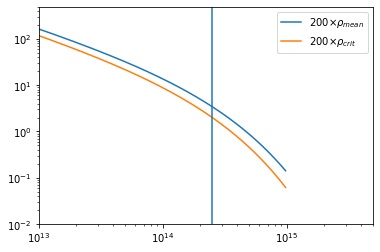

In [47]:
find_mass = 14.4
plt.plot(mf1.m, mf1.dndlog10m * volume * mf1.dlog10m,label=r'200$\times \rho_{mean}$')
plt.plot(mf2.m, mf2.dndlog10m * volume * mf2.dlog10m,label=r'200$\times \rho_{crit}$')
plt.axvline(10**find_mass)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlim(1e13,5e15)
plt.ylim(1e-2,5e2)
plt.show()

Fraction of times existing in 1000 tests: 2.061


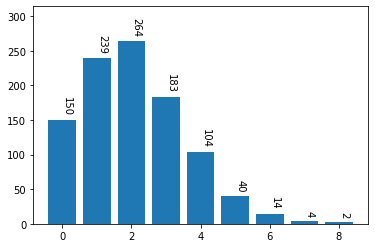

Probability (%) of 6 clusters of this mass:  1.4


In [50]:
counts_per_bin_mf2 = np.random.poisson(mf2.dndlog10m * volume.value * mf2.dlog10m)
sum_mf2 = 0
counts_vec = []
for i in range(1000):
    counts_per_bin_mf2 = np.random.poisson(mf2.dndlog10m * volume.value * mf2.dlog10m)
    counts = counts_per_bin_mf2[np.abs(mf2.m-10**find_mass).argmin()]
    counts_vec = np.append(counts_vec,counts)
    sum_mf2 = sum_mf2 + counts
print("Fraction of times existing in 1000 tests:",sum_mf2/1000)
heights, edges = np.histogram(counts_vec, bins=np.arange(0,10,1)) #Note density=True returns normalized PDF
left_edges = edges[:-1]
right_edges = edges[:]
centers = (left_edges + right_edges[0:len(right_edges)-1])/2.0
plt.bar(centers,heights)
for x,num,num in zip(centers, heights, heights):
    if num != 0:
        plt.text(x, num+10, num, fontsize=10, rotation=-90) # x,y,str
plt.ylim(0,np.max(heights)+50)
plt.show()
print("Probability (%) of 6 clusters of this mass: ",100*heights[6]/1000)

For interesting recent application of halo mass functions to test steallar mass distributions at high redshift using JWST here, see [this](https://ui.adsabs.harvard.edu/abs/2023MNRAS.518.2511L/abstract) paper.

## Cauchy-Schwwarz Inequality

One can show that: 
$$\begin{align}%\label{}
|E(XY)| \leq \sqrt{E[X^2] E[Y^2]} \tag{1.8},
\end{align}$$

# 2. Correlation and Covariance

## Correlation

Correlation is a bivariate analysis that measures the strength of association between two variables and the direction of the relationship. In terms of the strength of the relationship, the value of the correlation coefficient varies between +1 and -1. A value of ± 1 indicates a perfect degree of association between the two variables. As the correlation coefficient value goes towards 0, the relationship between the two variables will be weaker. The direction of the relationship is indicated by the sign of the coefficient; a + sign indicates a positive relationship and a – sign indicates a negative relationship.

###  
    Example 1.2.A Correlation of coins

#### 

Consider 4 coins and 5 flips each and we record the results:

Coin 𝐴 +,−,−,+,−

Coin 𝐵 −,−,−,−,+

Coin 𝐶 +,−,+,+,−

Coin 𝐷 −,+,−,−,+

Which coins are correlated and by how much?

....we define a function that is positive when the two results are similar, and negative when they are dissimilar. The easiest function is multiplication: it will be positive when the coins have the same result (++ or --) and negative when they differ (+- and -+). 

We can multiply each trial, $\it{then\ average\ the\ results}$ to get an overall estimate of how similar the results are.

$\begin{align*}
C_{AB} &= \frac{-1+1+1-1-1}{5} = -0.2\\
C_{AC} &= \frac{+1+1-1+1+1}{5} = 0.8 \\
C_{AD} &= \frac{-1-1+1-1-1}{5} = -0.8\\
\end{align*}$

So 𝐴 and 𝐵 seem mostly uncorrelated, 𝐴 and 𝐶 may be correlated, and 𝐴 and 𝐷 may be anti-correlated.

### Correlation Statistics

If the relationship between the variables is linear, statistics employs the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). If it is non-linear (but monotonic), the [Spearman's rank correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) and [Kendall's tau coefficient](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient) are used.


The <b>Pearson statistic</b> is defined as:

$$
\rho = \frac{\sum(X - \overline{X})(Y - \overline{Y})}
{\sqrt{\sum(X-\overline{X})^{2}\cdot\sum(Y-\overline{Y})^{2}}}\\
~ \\
\tag{1.9}
\begin{align*}
    Where, ~ \overline{X} &= mean ~ of ~ X~variable\\
    \overline{Y} &= mean ~ of ~ Y ~ variable\\
\end{align*}
$$

Key assumptions:

* Each observation should have a pair of values.
* Each variable should be continuous.
* It should be the absence of outliers.
* It assumes linearity and homoscedasticity.

The <b>Spearman rank order statistic</b> is defined as:
$$\rho = \frac{\sum_{i=1}^{n}(R(x_i) - \overline{R(x)})(R(y_i) - \overline{R(y)})}
{\sqrt{\sum_{i=1}^{n}(R(x_i) - \overline{R(x)})^{2}\cdot\sum_{i=1}^{n}(R(y_i)-\overline{R(y)})^{2}}}
= 1 - \frac{6\sum_{i=1}^{n}(R(x_i) - R(y_i))^{2}}{n(n^{2} - 1)}\\
~ \\
\begin{align*}
    Where, ~ R(x_i) &= rank ~ of ~ x_i\\
    R(y_i) &= rank ~ of ~ y_i\\
    \overline{R(x)} &=mean ~ rank ~ of ~ x\\
    \overline{R(y)} &=mean ~ rank ~ of ~ y\\
    n &= number ~ of ~ pairs
\end{align*}
$$

Key assumptions:

* Pairs of observations are independent.
* Two variables should be measured on an [ordinal, interval or ratio scale](https://www.questionpro.com/blog/nominal-ordinal-interval-ratio/#:~:text=The%20ordinal%20scale%20has%20all,characteristics%20of%20an%20interval%20scale.).
* It assumes that there is a monotonic relationship between the two variables.

The <b>Kendall tau rank order statistic</b> is defined as:
$$\tau = \frac{n_c - n_d}{n_c + n_d} = \frac{n_c - n_d}{n(n-1)/2}\\ 
~ \\
\begin{align*}
    Where, ~ n_c &= number ~ of ~ concordant ~ pairs\\
    n_d &= number ~ of ~ discordant ~ pairs\\
    n &= number ~ of ~ pairs
\end{align*}
$$

Calculating the concordant and discordant pairs is explained nicely [here](https://datatab.net/tutorial/kendalls-tau).

Key assumptions:

* Same as Spearman


There is a fun article which presents 13 different (!) interpretations of correlation [here](https://www.stat.berkeley.edu/~rabbee/correlation.pdf).

### Properties of Correlation

1. $-1 \leq \rho(X,Y) \leq 1$
2. if $\rho(X,Y)=1$ then $x$ and $y$ are positively correlated and $Y=aX+b$ and $a>0$.
3. if $\rho(X,Y)=-1$ then $x$ and $y$ are negatively correlated and $Y=aX+b$ and $a<0$.
4. if $\rho(X,Y)=0$ then $x$ and $y$ are uncorrelated.


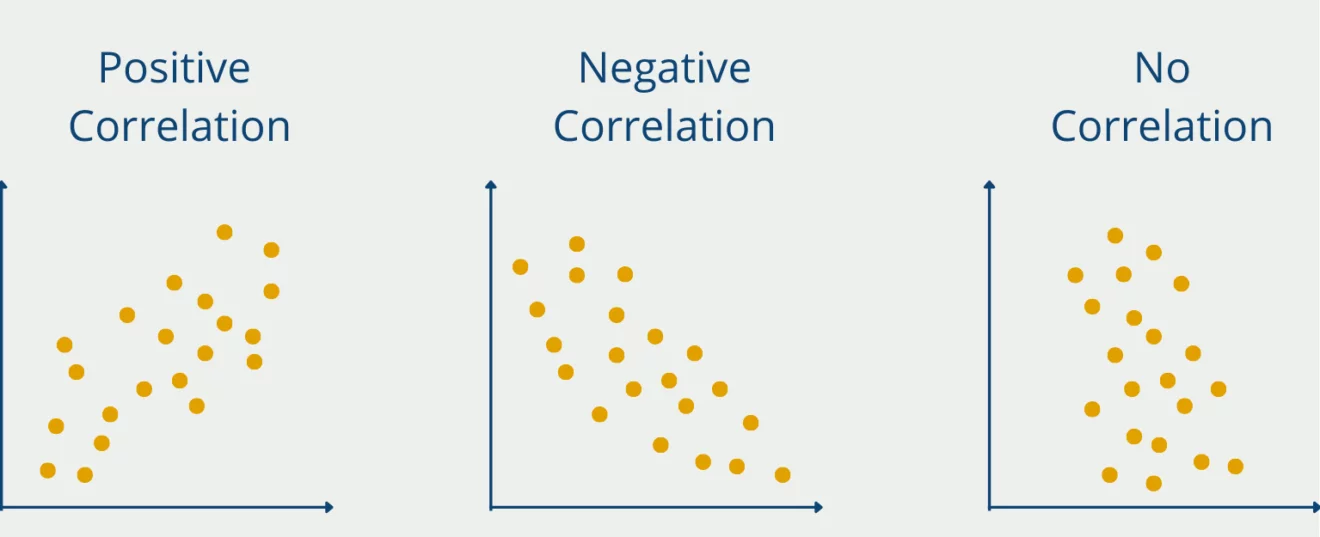

In [24]:
from IPython.display import Image
Image("correlation.png")

##  Covariance

For bivariate distributions (of two random variables), consider the probaility distribution $\phi(x,y)$ where the random variables $X$ and $Y$ are <i>NOT</i> independent, one can also define a covariance (assuming $⟨x⟩ = ⟨y⟩ = 0$):

$$Cov(x,y) = \langle xy \rangle = \int_{-\infty}^{\infty} xy\ \phi(xy)\ dxdy = E\big[(xy)\big] \tag{1.10}$$

This leads to a formal definition of the correlation coefficient (see equation 1.9):

$$r = \frac{Cov(x,y)}{Var(x)Var(y)} \tag{1.11}$$

where =<i>Var</i> is the variance as defined above. 

Sometimes, you will see an equivalent definiton using vectors (for centered data):

$$r = cos\theta = \frac{\vec{a} \cdot \vec{b}}{|a||b|}$$

If the data are not centered, then we have:
$$Cov(x,y) = E\big[(x-\mu_x)(y-\mu_y)\big]$$

and

$$r = \frac{E\big[(x-\mu_x)(y-\mu_y)\big]}{\sqrt{\mu^2_x\mu^2_y}}$$

which is the normalized covariance and the <i> Pearson correlation coefficient (see equation 1.9 above)</i>.

In practice for a sample of $x,y$ pairs, we write:

$$r = \frac{\sum_{i=1}^{N}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{N}(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{N}(y_i - \bar{y})^2}} $$

Covariance can range from -$\infty$ to +$\infty$. But Correlation ranges from -1 to +1. Unlike the correlation, the magnitude of the covariance does not mean anything since it is dependent upon the magnitude of the constituent of the series. However in both cases, the sign DOES matter. 

To be super clear, <i>correlation is the covariance</i>, but normalized to the sample variances. Because it is normalized, the value of the correlation becomes a meaningful quantity to compare to other correlations.

## Covariance/Correlation versus causation

It is important to stress that having strong correlation does not imply causation. The fact that two variables (observations) are strongly correlated oes not mean that a change in one variable will cause a change in the other as a consequence. 

Machine learning algorithms use correlation to identify patterns and dependencies between features in the data. The correlation between the features and the target variable can help in selecting the relevant features for the model. If two features are highly correlated, one of them can be removed from the model as it does not provide any additional information. This process is called feature selection.

Correlation can also help determine the direction of the relationship between the characteristics and the target variable. For example, a positive correlation between age and income means that as age increases, the income also increases. This information can help make predictions or recommendations based on the input data.

## Correlation Functions (or the operator)

$$C=⟨𝑓(𝑥′+𝑥)𝑔(𝑥′)⟩\tag{1.12}$$

which is actually the covariance from equation 1.10 above (where $(x'+x) \rightarrow y$ and where the lag from $x'$ equals $x$.
 
Correlation functions are a way to measure the degree of similarity between a series and a lagged version of that same series, or even a another series. The former is an autocorrelation function, the latter is a cross-correlation.

<b> Warning: </b> for reasons I do not understand, many computational libraries conflate covariance and correlation. For instance, scipy.signal.correlate is equation 1.12. In order to meet the definition of correlation (at least Pearson's definition of correlation), one needs to be careful on what to provide as input to scipy.signal.correlate. See our example below.

  
Autocorrelation (also called serial correlation) is: 
- the correlation of a function with itself but with a lag. 
- can be calculated by the Pearson’s correlation coefficient. 
- uses the same series twice - once in it’s original form and once in it’s lagged form.


### 
    Example 1.2.B Analyze 2 months of temperature data.

#### 

Calculate the autocorrelation of monthly temperatures for August and December.

1. Start by writing a function to the calculation using numpy's corrcoef.
2. We will explore the use of "roll" some more.
2. We will switch to a numpy and scipy library call

We obtain temperature [data](https://www.wunderground.com) for a couple of months. We will create arrays of daily temperatures which have a specified lag to them (i.e., one-day lag is x1=day 1-10; y1=day 2-11; two-day lag is y2=day 3-13....ten-day lag is x10=day 10-20; y10=day 20-30. We will apply numpy's "roll" function to make the task of creating lag vectors a bit easier. 

We the will use numpy's [corrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html), which returns an array of all possible correlations between two datasets. For example if <b>X</b> and <b>Y</b> are two arrays of data, the possible correlation coefficients which could be calculated are $r_{XX}, r_{XY}, r_{YX}, r_{YY}$. Of course $r_{XX}$ and $r_{YY}$ are auto-correlations while $r_{XY}$ = $r_{YX}$ are cross-correlations, which we will <i> not</i> use here.

In [3]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#The data to examine
day = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,
       16,17,18,19,20,21,22,23,24,25,26,27,28,29]
#Ann Arbor December 2021 temperature data from https://www.wunderground.com
dec_avg = [37.0,46.1,34.9,36.6,37.4,36.9,23.1,27.8,32.1,44.4,46.2,
           37.7,39.3,38.8,49.1,54.5,36.4,33.2,29.7,33.5,32.0,26.8,
           32.4,43.0,46.5,33.9,35.7,33.2,33.6]
aug_avg = [68.1,67.9,70.7,71.9,73.5,74.8,74.7,77.5,76.0,79.4,76.1,
           74.0,77.0,70.1,68.4,67.8,70.8,74.9,76.7,77.6,76.8,80.4,
           77.3,78.4,78.3,81.3,78.3,80.9,79.3]
#Place in arrays
day = np.array(day)
dec_avg = np.array(dec_avg)
aug_avg = np.array(aug_avg)

#Let's define a purely random series of temperatures that has the same mean 
# and spread of the data.
random1_avg = np.random.normal(np.mean(dec_avg), np.std(dec_avg), 
                               size = len(dec_avg))
random2_avg = np.random.normal(np.mean(aug_avg), np.std(aug_avg), 
                               size = len(aug_avg))

#Define max lag time (be careful with edges, maybe don't go 
#beyond vector length*3) 

#We have two choices, NUMPYs "roll" or our own defined lag.
#Keep in mind that our max lag is ~10 days (min lag is 0 days) 
#unless we code in a way to "roll over" the data
roll = True
if (roll):
    end = 29
else:
    end = 10
dec_corr = np.zeros((end,end))
aug_corr = np.zeros((end,end))
random1_corr = np.zeros((end,end))
random2_corr = np.zeros((end,end))
lag = np.arange(0,end,1)

for j in range(end):
    for i in range (end):
        #First, we calculate December's correlation function
        if (roll):
            avg_day = dec_avg
            avg_lag = np.roll(dec_avg,i)      
        else:
            avg_day = dec_avg[j:j+end]
            avg_lag = dec_avg[j+i:j+i+end]
        dec_corr[j,i] = np.corrcoef(avg_day,avg_lag)[1,0]
#       or we could use 
#      r_xy = (np.mean((avg_day - np.mean(avg_day))*(avg_lag - np.mean(avg_lag))))/
#           (np.sqrt(np.var(avg_day)*np.var(avg_lag)))    

        #Second, we calculate August's correlation function
        if (roll):
            avg_day = aug_avg
            avg_lag = np.roll(aug_avg,i)      
        else:
            avg_day = aug_avg[j:j+end]
            avg_lag = aug_avg[j+i:j+i+end]
        aug_corr[j,i] = np.corrcoef(avg_day,avg_lag)[1,0]  

        #Third, we calculate the random1 (Decemeber) data correlation function
        if (roll):
            avg_day = random1_avg
            avg_lag = np.roll(random1_avg,i)      
        else:
            avg_day = random1_avg[j:j+end]
            avg_lag = random1_avg[j+i:j+i+end]
        random1_corr[j,i] = np.corrcoef(avg_day,avg_lag)[1,0]  
        #Fourth, we calculate the random2 (August) data correlation function
        if (roll):
            avg_day = random2_avg
            avg_lag = np.roll(random2_avg,i)      
        else:
            avg_day = random2_avg[j:j+end]
            avg_lag = random2_avg[j+i:j+i+end]
        random2_corr[j,i] = np.corrcoef(avg_day,avg_lag)[1,0]  

dec_mean_r = np.mean(dec_corr,axis=0)
aug_mean_r = np.mean(aug_corr,axis=0)
data_mean_r = (dec_mean_r + aug_mean_r)/2
random1_mean_r = np.mean(random1_corr,axis=0)
random2_mean_r = np.mean(random2_corr,axis=0)
random_mean_r = (random1_mean_r + random2_mean_r)/2.0
    

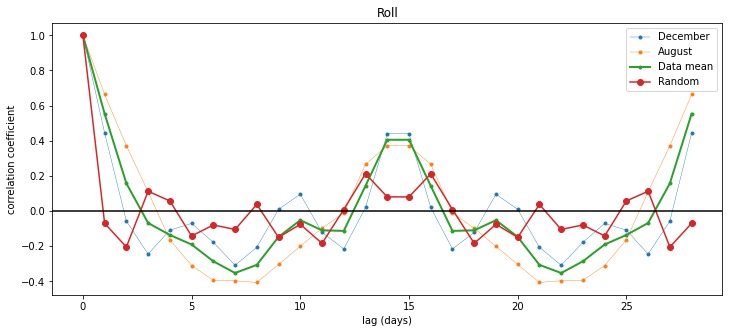

In [4]:
#Now, make the plot
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,1,1)  

ax1.plot(lag,dec_mean_r,'.-',linewidth=0.4, label='December')
ax1.plot(lag,aug_mean_r ,'.-',linewidth=0.4,label='August')
ax1.plot(lag,data_mean_r ,'.-',linewidth=2,label='Data mean')

ax1.plot(lag,random_mean_r,'o-',label='Random')
ax1.axhline(0,color='black')
ax1.set_xlabel('lag (days)')
ax1.set_ylabel('correlation coefficient')
ax1.legend()
if (roll):
    ax1.set_title('Roll')
else:
    ax1.set_title('Lag vectors')
plt.show()

Intrepret this figure. Also, what's happening at t=14 or t =15 days or t=30 days?

#### 
    There MUST be an "easier" way to do this?!
   

We will use scipy.signal library and the correlate function. We also need the lags given by correlation_lags (instead of calculating our own). <b> The function signal.correlation_lags is only available in scipy 1.6+</b>

<b>NOTE:</b> scipy.signal.correlate does not naturally return the equivalent of the Pearson correlation (see above). In order to do so, one must use the centered data and also normalize the input to the standard deviation.

In [5]:
##You must have version scipy.signal >=1.7 to use correlation_lags
import scipy
print(scipy.__version__)
import scipy.signal as signal

dec_corr2 = signal.correlate((dec_avg - np.mean(dec_avg))/np.std(dec_avg),
                             (dec_avg - np.mean(dec_avg))/np.std(dec_avg),
                             mode='full',method='direct')/len(dec_avg)
dec_lag2 = signal.correlation_lags(dec_avg.size,dec_avg.size,mode='full')
aug_corr2 = signal.correlate((aug_avg - np.mean(aug_avg))/np.std(aug_avg),
                             (aug_avg - np.mean(aug_avg))/np.std(aug_avg),
                             mode='full',method='direct')/len(aug_avg)
aug_lag2 = signal.correlation_lags(aug_avg.size,aug_avg.size,mode='full')


1.9.3


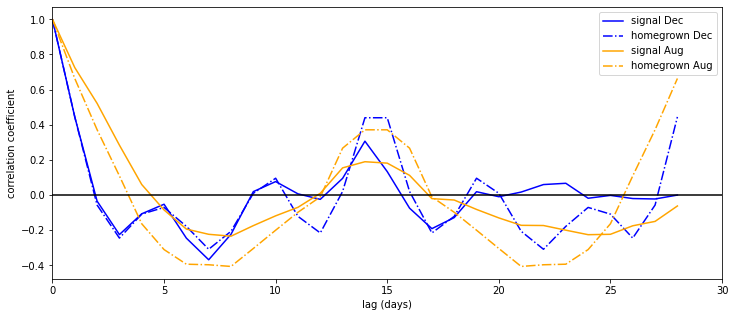

In [6]:
#Now make the plot
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,1,1)  
ax1.plot(dec_lag2,dec_corr2,'b',label='signal Dec')
ax1.plot(lag,np.mean(dec_corr,axis=0),'b',linestyle='-.',label='homegrown Dec') 
ax1.plot(aug_lag2,aug_corr2,'orange',label='signal Aug')
ax1.plot(lag,np.mean(aug_corr,axis=0),'orange',linestyle='-.',label='homegrown Aug') 
ax1.axhline(0,color='black')
ax1.set_xlabel('lag (days)')
ax1.set_ylabel('correlation coefficient')
ax1.set_xlim(0,30)#NOTE THE LIMIT OF 0. What happens if I DROP THIS?
ax1.legend()
plt.show()

Note that both calculates are close to each other, but not identical. When in doubt and when you really want a correlation coefficient (function), use np.corrcoef.

While it does make things less cumbersome, you still need to be careful about your interpretation of the resultes.

For instance, I plotted only for lags >0. If you remove that, you will see the mirror image appear:

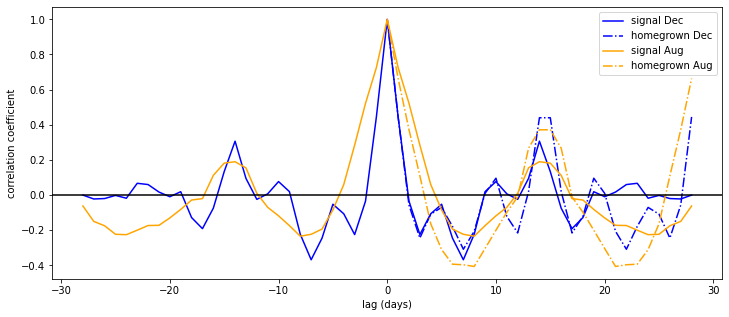

In [23]:
#Now make the plot
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,1,1)  
ax1.plot(dec_lag2,dec_corr2,'b',label='signal Dec')
ax1.plot(lag,np.mean(dec_corr,axis=0),'b',linestyle='-.',label='homegrown Dec') 
ax1.plot(aug_lag2,aug_corr2,'orange',label='signal Aug')
ax1.plot(lag,np.mean(aug_corr,axis=0),'orange',linestyle='-.',label='homegrown Aug') 
ax1.axhline(0,color='black')
ax1.set_xlabel('lag (days)')
ax1.set_ylabel('correlation coefficient')
ax1.legend()
plt.show()

We will come back to this issue when we discuss convolution (next).

Also, note that I used "direct" in the function call (which is just summing). We will talk about the FFT option later.

### 
    Example 1.2.C Analyze years of temperature data.

1. Use data file was generated using [NOAA](https://www.ncei.noaa.gov/pub/data/ghcn/daily/) stations in France and reports the minimum and maximum temperature recorded in tenths of degree celsius.
3. Use PANDAS to manipulate the dataset.

By now, you should realize that the time series is too short to see anything interesting, other than that daily temperatures have a high absolute correlation than a random draw of temperatures. A weird features appear at ~15/30 days. This is obviously because we are rolling over the data by 15 days out for day 15.

So let's work with a MUCH bigger dataset. In doing so, we will utilize the [Pandas](https://pandas.pydata.org/) library to [wrangle](https://www.geeksforgeeks.org/data-wrangling-in-python/) the data. As a scientific researcher, you will spend a signigicant amount of your time "wrangling" astronomical data. |

#### 

Working with timeseries data can be very tricky (we will cover time later). For now, we note that we need to make sure python understands the dates/times we have been provided. You should look [here](https://saturncloud.io/blog/handy-dandy-guide-to-working-with-timestamps-in-pandas/) for more details.


In [7]:
import pandas as pd
import datetime
filename = './weather_data.csv'
weather = pd.read_csv(filename,na_values=(-9999),parse_dates=['DATE'])
#Let's see what we just read in:
print(weather)
#We should see some indices, the Station ID, the Date, the Precip, and the tmax tmax tmin

        Unnamed: 0            STATION       DATE  PRCP   TMAX  TMIN
0                0  GHCND:FR013055001 1993-01-01   0.0   75.0 -18.0
1                1  GHCND:FR013055001 1993-01-02  26.0   83.0  19.0
2                2  GHCND:FR013055001 1993-01-03   0.0   37.0   8.0
3                3  GHCND:FR013055001 1993-01-04   0.0   64.0 -19.0
4                4  GHCND:FR013055001 1993-01-05   0.0   91.0  -2.0
...            ...                ...        ...   ...    ...   ...
309742      309742  GHCND:FRE00104899 2004-12-28   NaN   98.0  25.0
309743      309743  GHCND:FRE00104899 2004-12-29   NaN  100.0  59.0
309744      309744  GHCND:FRE00104899 2004-12-30   NaN  100.0  70.0
309745      309745  GHCND:FRE00104899 2004-12-31   NaN  108.0  78.0
309746      309746  GHCND:FRE00104899 2005-01-01   NaN  108.0  87.0

[309747 rows x 6 columns]


In [9]:
#Let's report the station used on our first date
w = np.where(weather['DATE'] == '1993-01-01')[0]
print(weather['STATION'][w])

0         GHCND:FR013055001
4384      GHCND:FRE00104930
8768      GHCND:FG000081405
16374     GHCND:FRE00104977
20758     GHCND:FR000007190
                ...        
281436    GHCND:FRE00104975
285820    GHCND:FR000007255
293486    GHCND:FP000091925
300979    GHCND:FRE00104904
305363    GHCND:FRE00104899
Name: STATION, Length: 61, dtype: object


In [31]:
#Using the pandas dataframe, I want to drop all NaNs, 
# groupby the DATE, and take the mean of the remaining values
weather = weather.dropna().groupby('DATE').mean()
#I will make a vector of actual temperatures. 
#Note that the data is given in 10ths of degrees (READ-THE_DOCS)
temp = (weather['TMAX'] + weather['TMIN']) / 20. #in tenth of degrees and a factor or 2 for average
date = weather.index.to_pydatetime() #Make a vector of the dates
print(date)
N = len(temp)
keep = np.where((date >datetime.datetime(1994, 1, 1 )) & (date <datetime.datetime(2004, 1, 1 )))[0]
print(keep)

[datetime.datetime(1993, 1, 1, 0, 0) datetime.datetime(1993, 1, 2, 0, 0)
 datetime.datetime(1993, 1, 3, 0, 0) ...
 datetime.datetime(2013, 12, 30, 0, 0)
 datetime.datetime(2013, 12, 31, 0, 0) datetime.datetime(2014, 1, 1, 0, 0)]
[ 366  367  368 ... 4014 4015 4016]


/tmp/ipykernel_183261/772611449.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather = weather.dropna().groupby('DATE').mean()


Text(0, 0.5, 'Mean temperature')

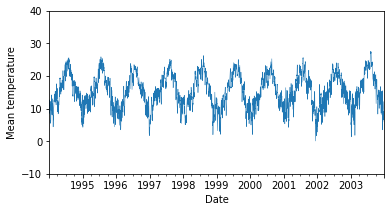

In [32]:
#Plot the data using PANDAS
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
temp[keep].plot(ax=ax, lw=.5)
ax.set_ylim(-10, 40)
ax.set_xlabel('Date')
ax.set_ylabel('Mean temperature')

Lengths of lags and correlation coefs: 7647 7647


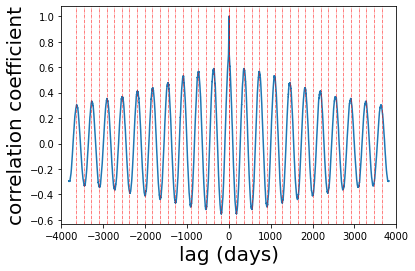

In [81]:
import scipy.signal as signal
#corr = signal.correlate(temp,temp,mode='same')
corr = signal.correlate((temp-np.mean(temp))/np.std(temp),
                        (temp-np.mean(temp))/np.std(temp),mode='same')/len(temp)
corr_lag = signal.correlation_lags(len(temp),len(temp),mode='same')
print('Lengths of lags and correlation coefs:',len(corr_lag),len(temp))
plt.plot(corr_lag, corr)
plt.xlim(-4000,4000)
for i in range(21):
    plt.axvline(365.25*i/2, color='red',linestyle='-.',linewidth=0.5) 
    #We plot the year and half year's of the data
    plt.axvline(-365.25*i/2, color='red',linestyle='-.',linewidth=0.5) 
    #We plot the year and half year's of the data

plt.xlabel('lag (days)',fontsize=20)
plt.ylabel('correlation coefficient',fontsize=20)
plt.show()

## Some lessons from Correlation and Covariance

- Covariance and correlation are often confusing conflated in the literature
    - for instance, if the data have unit variance (i.e. a scaled Gaussian), correlation is exactly covariance
    - sometimes texts/authors will assume the variance can just be scaled out and write their theory accordingly
    - you don't always know that or understand the consequences of a throw-away comment in their text
    - Calculating covariance is straightforward, but occasionally there can be numerical issues (see Wikipedia for examples)
    - There is no "right" way to calculate correlation (see above where we tried 3(!) techniques) and they do not always agree. 
    - The 2-pt spatial correlation function is calculated through "pair counting" within spheres of radius $R$ --the lag. Counts are made in the data and compared to randomly distributed points. This looks NOTHING like the tools we have used above which are common in 1D signal processing.
    - The coin example is another case where we have "made up" our measure of correlaton.

## Correlation and Covariance with continuous functions

When discussing signal processing, you will often see correlation expressed as a continuous integral:

$$(f \otimes g)(\tau) = \int_{-\infty}^\infty f^*(t) g(t + \tau) dt  \tag{1.13}$$

where $f$ and $g$ are signals at given times $t$ with some lag $\tau$. If the signal is light (or anything that could be represented as a complex number), then we require the complex conjugate of $f$ in the integrand (shown as $f^*$.

# 3. Convolution

## The definition

The result of a convolution of two functions (series) <i>is a new function</i> that gives the totaled multiple for any point in a series. 

When discussing signal processing, you will often see convolution expressed as:

$$(f \star g)(\tau) = \int_{-\infty}^\infty f(t) g(\tau -t) dt \tag{1.14}$$
$$(g \star f)(\tau) = \int_{-\infty}^\infty f(\tau -t) g(t) dt$$

Note the new symbol $\star$ representing the operation and note that one of functions is <i> reversed </i>. We speak of $f$ being the source and $g$ being the filter of the convolution.

### 
    Example 1.3.A

Imagine you manage a hospital treating patients with a single disease. 

You have:

- A treatment plan: Every patient gets 5 units of the cure on their first day.
- A list of patient counts per day of the week: [1 2 3 4 5]

How much medicine do you use each day? 

5 $\times$  [ 1 2 3 4 5] = [5 10 15 20 25] units....easy.

You change to a more realistic treatment plan: 
- A treatment plan: [5 3 1] Every patient gets 5 units of the cure on their first day, 3 their second, 1 their third.

We can do this, but it gets harder. 

The trick is to flip the treatment plan to [1 3 5]  and walk the treatment schedule backwards through the patients. Here's the view:

Monday

    1  3  5                  
          *
         [1  2  3  4  5] 
    
         =5           
            
Tuesday

      1  3  5       
         *  *
        [1  2  3  4  5]
    
         3 +10 = 13
              

Wednesday
 
          1  3  5 
          *  *  *
         [1  2  3  4  5]
    
          1 + 6 + 15 = 22
             
Thursday

             1  3  5
             *  *  *
         [1  2  3  4  5]
    
             2+ 9 +20 = 31
        
Friday

                1  3  5
                *  *  *
         [1  2  3  4  5]
       
                3 +12+25 = 40            

And we have to finish the treatments of the patients who came in later in the week:

Saturday

                   1  3  5
                   *  *
         [1  2  3  4  5]
    
                   4 + 15 = 19
      
Sunday

                      1  3  5
                      *
         [1  2  3  4  5]
    
                      = 5

Which leaves us with the following requirements for our treatment units:
[5 13 22 31 40 19 5]

This calculation is the convolution of the plan and patient counrs.

## Properties

Some useful properties of the convolution include:

- It is commutative
- It integrates as seperable functions: $$\int f \star g = \int f \int g$$
- $\displaystyle{f(t) \star \delta(t) = f(t)}$
- $\displaystyle{f(t) \star \delta(t - T) = f(t - T)}$

The <a href="https://en.wikipedia.org/wiki/Convolution">convolution</a> of two discretely sampled (with $N$ samples) functions $f_i$ and $g_i$ is defined as $$(f * g)_k = \sum_{i=0}^{N-1} f_k g_{i-k} \tag{1.15}$$.

In other words, to calcuate the convolution: (1) multiply two functions and sum them to get a number and (2) repeat the procedure for all possible offsets.

We next compute the convolution of a gaussian or $\chi^2$ with two delta functions using equation 1.15:

### 
    Exercise 1.3.1 Convolution of a Gaussian and a Delta function

1. First, define a very simple function to sum of the multiplication of two vectors as in equation 1.15. Use the np.roll and be sure to reverse the indices for $g$.
2. Second, define a way to create a vector for $g$ that is a Gaussian. Define this function over the abscissa represented by $t$. Use 512 steps and let $t_0 = 0$ and $t_{512} = 1$. Center the Gaussian half way through the time series.
3. Third, define your target to be two delta functions place at 1/6th and 5/6th of the way through the series.
4. Plot the time series (0,1), the filter, and the targets for both filters.

##### 
    Answer:

##### 

Your result should show that the convolved delta functions are not at the correct locations. How do you know this?

This is because the lag ($\tau$ in the formula or $i$ in the code) walks forward from where it starts (see above example). So our lags have a <i> shift </i> that we must account for, which in this case is N/2 What's tne solution? We <i>roll</i> $t$ forward by this amount. Use the np.roll function and plot the convolution versus: np.roll(t,np.int(N/2)):

We can also just remove this shift if we change our "filter" ($g(t)$) to be centered on the origin.

In many cases, it is best to just keep things centered at the origin if possible, especially the filter inside a convolution.

Maybe scipy is a better option.  Import the SCIPY signal library and use signal.convolve.

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
N = 512
t = np.arange(0,N)/N ## n/N becomes time, a variable from 0 to 1. Note that it is COMPLEX
g = np.exp(-5 * ((t-np.mean(t))/.1)**2.)
    
#Create the two delta functions over the 1024 space used earlier.
f = np.zeros(N)
f[int(N*1/6)] = 1.
f[int(N*5/6)] = 1.

In [7]:
from scipy import signal
print(len(g), len(f))
sp_conv = signal.convolve(f, g, mode='same')
print(np.size(sp_conv))

512 512
512


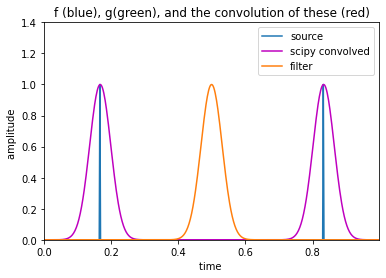

In [8]:
#plot it
plt.plot(t,f, label='source')
plt.plot(t,sp_conv,"m", label='scipy convolved')
plt.plot(t,g,label='filter')
plt.legend(loc='best')
plt.axis([np.min(t),np.max(t),0,1.4])
plt.xlabel("time ")
plt.ylabel("amplitude ")
plt.title("f (blue), g(green), and the convolution of these (red)")
plt.show()

SCIPY's version works "out-of-the-box". But it has a new parameter called "mode". Let's change it to 'full':

In [9]:
from scipy import signal
print(len(g), len(f))
sp_conv = signal.convolve(f, g, mode='full')
print(np.size(sp_conv))

512 512
1023


Notice now that I used mode='full' instead of mode = 'same' and the size of the output is bigger. SCIPY states that the new array has length len(f) + len(g) + 1, which is what we see. SCIPY also says that the source is <i> padded </i>. 

Obviously, we cannot just plot time versus the convolution....they are two different sized vectors. So what us going on? 

To understand the difference between "same" and "full", look back at the example of the patient treatment and the patient numbers above. Full is more like the example I showed, where the convolved data extend <i>outside</i> the range of the source data (i.e., in this case, after Friday).

So to make this work, we need to plot the convolution against an axis that includes padding.

Finally, add time steps that take the axis from 0-1 to -0.5 to +1.5.

In [10]:
dt = t[1]-t[0]
t_g1 = [] #padding on the left
t_g2 = [] #padding on the right
for i in range(np.int(len(g)/2),0,-1):
    t_g1 = np.append(t_g1,-i*dt + np.min(t))
for i in range(1,np.int(len(g)/2),1):
    t_g2 = np.append(t_g2,i*dt+np.max(t))
t_conv = np.append(t_g1,t)
t_conv = np.append(t_conv,t_g2)
print('Original time axis extent:', np.min(t), np.max(t))
print('Padded time axis extent:',np.min(t_conv), np.max(t_conv))

Original time axis extent: 0.0 0.998046875
Padded time axis extent: -0.5 1.49609375


/tmp/ipykernel_3150933/3324111289.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for i in range(np.int(len(g)/2),0,-1):
/tmp/ipykernel_3150933/3324111289.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in Num

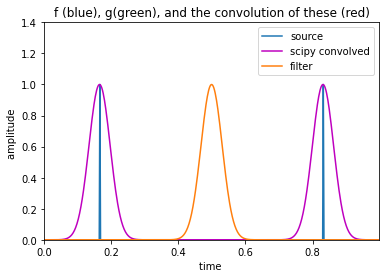

In [11]:
#plot it
plt.plot(t,f, label='source')
plt.plot(t_conv,sp_conv,"m", label='scipy convolved')
plt.plot(t,g,label='filter')
plt.legend(loc='best')
plt.axis([np.min(t),np.max(t),0,1.4])
plt.xlabel("time ")
plt.ylabel("amplitude ")
plt.title("f (blue), g(green), and the convolution of these (red)")
plt.show()

Lesson: Be CAREFUL with how you define your source and filter functions and their origins. A convolution is not just something you look up, calculate, or otherwise employ without first understanding the time component. More importantly, the computer does not care or recognize the time component or what it means. The convolution just takes $f$ and $g$, it <it> does not </it> take $t$. 

## Convolution and Random Variable Statistics

We can use the idea of the convolution in the context of <i> random variables </i> as introduced above.

For instance, we often will want to quantify the statistics of a sample of data, where each data point is drawn from a distribution, perhaps the same distribution or more likely a different distribution per datum. How do we go about inferring the <i> sample </i> probability distribution? Recall that when we consider the probability of summation of random variables we <i>multiply</i> together their probabilities.

We use the <i>convolution operator</i>. (see above for information on the expectation values of the sample).

### 
    Example 1.3.B

Let's use some examples:
Let X, Y come from a Uniform distribution with a range (1, 4) (i.e., independent rolls of a fair 4-sided die). What is the PMF of the sum of two dice rolls: Z = X + Y ?

We know that for the range of Z we have the following, since it is the sum of two values each in
the range $\Omega_X = {2, 3, 4, 5, 6, 7, 8}$

Should the probabilities be uniform? That is, would you be equally likely to roll a 2 as a 5? No, because
there is only one way to get a 2 (rolling (1, 1)), but many ways to get a 5. So we need to drop the idea that the PMFs of the indivudual data carry through to the PMF of the sample.

If I wanted to compute the probability that Z = 3 for example, I could just sum over all possible values of X that sum to 3 from two dice rolls (in our allowed choices for each of $\Omega_X = {1, 2, 3, 4}$):
\begin{align*}
P (Z = 3) & = P (X = 1, Y = 2) + P (X = 2, Y = 1) \\
 &  = P (X = 1) P (Y = 2) + P (X = 2) P (Y = 1) \\
 & = \frac{1}{4}\frac{1}{4} + \frac{1}{4}\frac{1}{4} \\
 & = \frac{2}{16}
\end{align*}

Now, let's re-write that sum to look like this:
\begin{align*}
P (Z = 3) & = P (X = 1, Y = 2) + P (X = 2, Y = 1) + P (X = 3, Y = 0) + P (X = 4, Y = -1) \\
 &  = P (X = 1) P (Y = 2) + P (X = 2) P (Y = 1) + P (X = 3) P (Y = 0) + P (X = 4) P (Y = -1) \\
 & = \frac{1}{4}\frac{1}{4} + \frac{1}{4}\frac{1}{4} + \frac{1}{4} 0 + \frac{1}{4} 0 \\
 & = \frac{2}{16}
\end{align*}

## Disrete Convolution


Maybe you notice that $X$ is counting up, while $Y$ is counting down, and it has a lag. This is just a convolution:

\begin{align*}
p_Z(z) & = P (Z = z)\\
      & =  \displaystyle\sum_{j=1}^{4} P (X+Y) \\
      & =  \displaystyle\sum_{j=1}^{4} P (X = j, Y = z − j)\\
      & =  \displaystyle\sum_{j=1}^{4} P (X = j) P (Y = z − j)\\
      & =  \displaystyle\sum_{j=1}^{4} p_X(j)p_Y (z − j) \tag{1.16}\\
\end{align*}

This is the discrete convolution. Note that $p_x(x) = P(X=x)$ because we are using a discrete example with PMFs.

<i> This means that the probability of the sum of random variables is a convolution of their underlying probability distributions.</i>
    
To summarize, if $X$ and $Y$ are two independent integer-valued random variables, with distribution functions $\phi_X$ and $\phi_Y$ respectively. Then the convolution of $\phi_X$ and $\phi_Y$ is the distribution function $\phi_Z = \phi_X \star \phi_Y$ given by: 

$$\phi_Z(j) = \sum_k \phi_X(k) \star \phi_Y(j − k)$$ 

for j = ..., −2, −1, 0, 1, 2, ....

### 
    Example 1.3.C Convolution of 2 Poissons

Suppose $X$ and $Y$ are two independent discrete random variables with distribution functions $p_X(x)$ and $p_Y(y)$, such that X ∼ Poisson($\lambda_1$) and Y ∼ Poisson($\lambda_2$. Let $Z = X + Y$ . We would like to determine the distribution function $p_z(z)$ of $Z$. 

We start with equation 1.16:

\begin{aligned}
p_z(z) & = P(Z = z)\\
& = \displaystyle\sum_{j=0}^{z} P(X = j\ \rm{and\ }\ Y = z − j)\ \ \ \ \rm{so\ } X + Y = z \\
& = \displaystyle\sum_{j=0}^{z} P(X = j)P(Y = z − j)\ \ \ \ \rm{ since\ X\ and\ Y\ are\ independent} \\
& = \displaystyle\sum_{j=0}^{z} \frac{e^{−λ_1} λ^j_1}{j!}\frac{e^{−λ_2} λ^{z-j}_2}{(z-j)!} \\
& = \displaystyle\sum_{j=0}^{z} \frac{1}{j! (z − j)!}e^{−λ_1} λ^j_1\ e^{−λ_2} λ^{z-j}_2 \\
& = \displaystyle\sum_{j=0}^{z} \frac{z!}{j! (z − j)!}\frac{e^{−λ_1} λ^j_1\ e^{−λ_2} λ^{z-j}_2}{z!}\ \ \ \ \rm{multiply\ and\ divide\ by\ z!} \\
& = \displaystyle\sum_{j=0}^{z}  \binom{z}{j}\frac{e^{−λ_1} λ^j_1\ e^{−λ_2} λ^{z-j}_2}{z!}\ \ \ \ \rm{using\ binominal\ coefficients} \\
& = \frac{e^{−λ}}{z!}\displaystyle\sum_{j=0}^{z}  \binom{z}{j} λ^j_1\ λ^{z-j}_2\ \ \ \rm{factoring\ out\ z!\ and\ e
^{−λ_1} e^{−λ_2}\ =\ e^{−λ_1 − λ_2}\ =\ e^{−λ}} \\
& = \frac{e^{−λ}}{z!}(\lambda_1 + \lambda_2)^z\ \ \ \ \rm{using\ binomial\ expansion\ (in\ reverse)}\\
& = \frac{e^{−λ}\lambda^z}{z!}
\end{aligned}

In other words,  $Z$ ∼ Poisson($\lambda_1 + \lambda_2$).

## Continuous Convolution

As we did early for probabilities, we employ the cumulative probability $\Phi$ introduced above:

\begin{align*}
  \Phi_Z(z) & = P(Z \le z) = \int_{-\infty}^{\infty} \int_{-\infty}^{z-x} \phi_{XY}(x,y) \,\mathrm{d}y\,\mathrm{d}x
\end{align*}
where $\phi$ is the probability density function and $\Phi$ is the cumulative probability.

\begin{align*}
\Phi_Z(z) &= \int_{-\infty}^{\infty} \int_{-\infty}^{z} \phi_{XY}(x,v-x) \,\mathrm{d}v \,\mathrm{d}x \\
   &= \int_{-\infty}^z \int_{-\infty}^{\infty} \phi_{XY}(x, v-x) \,\mathrm{d}x \,\mathrm{d}v
\end{align*}


Now, recall from above $$\phi(x) = \frac{d\Phi(x)}{dx} $$.

\begin{align*}
\phi_{Z}(z) & = \int_{-\infty}^{\infty} \phi_{XY}(x, z-x) \,\mathrm{d}x
\end{align*}


If $X$ and $Y$ are independent, then we can rewrite this as:

\begin{align*}
\phi_{X+Y}(z)&  = \int_{-\infty}^{\infty} \phi_X(x) \phi_Y(z-x) \,\mathrm{d}x \tag{1.17}
\end{align*}

Which is what we defined in equation 1.14 above. It should be clear that when considering the distribution function of the summation of random variables, we are in fact doing a convolution of their individual distribution functions.

## Moments of the Convolution

Given equation 1.17, we ask the next question, what is the expectation value of $\phi_{X+Y}$? In other words, what is the first moment of the convolution? 

We let $\phi_X \rightarrow f$ and $\phi_Y \rightarrow g$ and switch to "time like" variables $t$ (instead of $x$) and $\tau$ instead of $z$.

\begin{align*}
M^1(f \star g) & = \int \tau \big\{\int f(\tau-t)g(t)dt\big\}d\tau \\
& = \int \big\{g(t) \int \tau f(\tau-t)d\tau\big\}dt
\end{align*}

change variables via:

$x = \tau -t$ and $\tau = t +x$ and $dx = d\tau$.

\begin{align*}
& = \int \big\{ g(t) \int (t + x) f(x) dx \big\} dt \\
& = \int g(t) \big \{t \int f(x) dx + \int x f(x) dx \big\} dt \\
& = M^0(f) \int t g(t) dt + M^1(f) \int g(t) dt\\
& = M^0(f) M^1(g) + M^1(f) M^0(g) \\
& = M^1(g) + M^1(f) \\
\end{align*}

where $M^0 = 1$, since the PDFs are all normalized. 

Thus, the first mnoment of the sum of two random variables is the sum of the individual moments.

1. Convolution iscommutative: $f \star g = g \star f$.
2. The integral of the convolution is the product of the integrals: $\int{f \star g} = \int{f}\int{g}$
3. There is an impulse response such that $f(t) \star \delta(t) = f(t)$.


## 2D Convolution

Convolutions can be done in any dimension. 

Consider the 2D case where there is a target and a filter.

The target looks like:

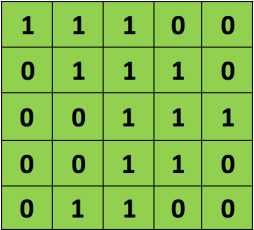

In [2]:
from IPython.display import Image
Image("target.png")

The filter looks like this:

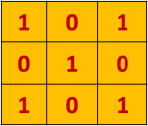

In [3]:
from IPython.display import Image
Image("filter.png")

and the convolution can be calculate with simple matrix multiplication:

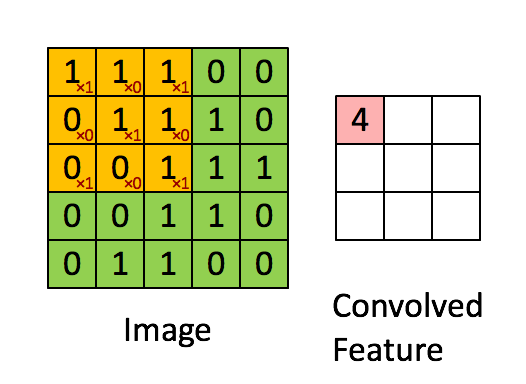

In [4]:
from IPython.display import Image
Image("conv_2d.gif")

# 4. Fourier Analysis

## Fourier Series

- The Fourier Series is the circle & wave-equivalent for estimating a function like one does with a [Taylor Series](https://en.wikipedia.org/wiki/Taylor_series). 

- The Fourier Series breaks down any periodic function into a simple series of sine & cosine waves.

- The Fourier Series a key underpinning to any & all digital signal processing

- a Fourier Series cannot be applied to general functions — it can only converge to periodic functions

$$f(x) \sim g(x) = \displaystyle\sum_{n=0}^{\infty} \{a_n cos(n\times x) + b_n sin(n\times x)\} \tag{1.18}$$

where $g(x)$ is the approximation of the function $f(x)$.

What are the $a$ and $b$s? 

### 
    Example 1.4.A Estimate a periodic function with a Fourier series

##### Defne a periodic function to approximate with a Fourier Series


We want to approximate a periodic function f(x), with fundamental period T, with a Fourier series. 

Suppose our function $f(x)$ looks like this (note that we will carefully and explicitly make it periodic):

512


/tmp/ipykernel_707975/3670582320.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.append(y, np.piecewise(x[i], [(np.int(x[i])%2) != 0 < 0,
/tmp/ipykernel_707975/3670582320.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informa

Text(0.5, 1.0, 'f(x)')

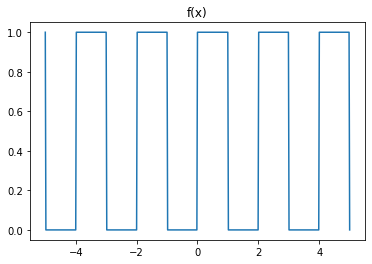

In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(0,5,257)
y = []
for i in range(len(x)):
    y = np.append(y, np.piecewise(x[i], [(np.int(x[i])%2) != 0 < 0, 
                            (np.int(x[i])%2) == 0], [-1, 1]))
x2 = np.linspace(-5,0,256)
y2 = []
for i in range(len(x2)):
    y2 = np.append(y2, np.piecewise(x2[i], [(np.int(x2[i])%2) == 0 < 0, 
                            (np.int(x2[i])%2) != 0], [-1, 1]))
xvec = np.append(x2[0:len(x2)-1],x) #We stop x2 JUST BEFORE it hits zero, since x starts with zero.
yvec = np.append(y2[0:len(y2)-1],y)
plt.plot(xvec,yvec)
print(len(xvec))
fx = yvec
plt.title('f(x)')

##### What does the Fourier Series look like mathematically?

Notice that we can re-write equation 1.18 as:

$g(x) = {a_0} + \displaystyle\sum_{n=1}^{\infty} \{a_n cos(n\times x) + b_n sin(n\times x)\} \tag{1.19}$  

Notice that $g(x)$ is now the sum of one constant and a series of sines and cosines, with $b_0 =0$.

Summing a series to $\infty$ is problematic. Limits can sometimes be applied, but computers do not work to $\infty$.

##### Periodicity implies constraints on what $n\times x$ can be. How do we rewrite eq 19 to reflect this?

$g(x) = a_0 + \displaystyle\sum_{n=1}^{?} \{a_n cos(\frac{2\pi n}{P}\times x) + b_n sin(\frac{2\pi n}{P}\times x)\}$

where $P$ here is the period of the repeatibility of the function. 

##### When does the series stop?

$$g_{M,N}(x) = {a_0} + \displaystyle\sum_{m=1}^{M} a_m cos(\frac{2\pi m}{P}\times x) + \displaystyle\sum_{n=1}^{N} b_n sin(\frac{2\pi n}{P}\times x) \tag{1.20}$$

for now, we stop at M and N, but we need to decide this later.....

##### What do the terms mean and how do we solve for them?

Since the periodicity is contained in the two terms with sines and cosines, the first term in equation 1.20 must just be the average value of $f(x)$. The series is then constructed to provide the right amount (and sign) of variations around this average to $f(x)$.

So we just use equation 1.3 (the arithmetic mean) to explain $a_0$:

$$
a_0 = \frac{1}{P}\displaystyle\int_{0}^{P} f(t) dt 
$$

So what is $a_0$ for our function which has a period $P=2$?

In [9]:
print(np.mean(fx[(xvec < 2) & (xvec >0)]))
gx = np.repeat(np.mean(fx[(xvec < 2) & (xvec >0)]),len(xvec))

0.5


Text(0.5, 1.0, 'g(x)')

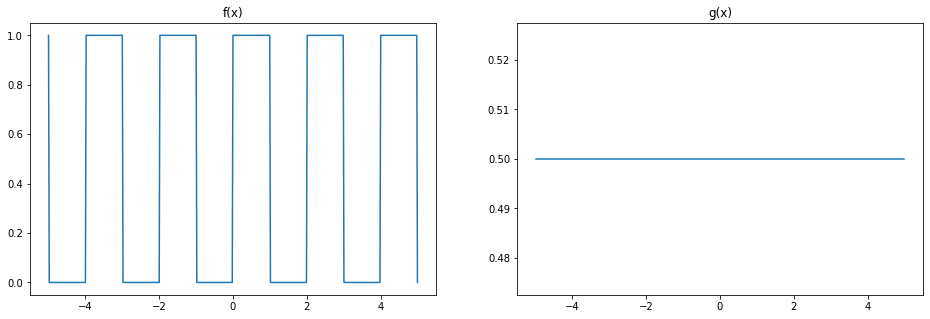

In [10]:
#Now, make the plot
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(1,2,1)  
ax2 = plt.subplot(1,2,2) 

ax1.plot(xvec,fx)
ax1.set_title('f(x)')

ax2.plot(xvec,gx)
ax2.set_title('g(x)')

So currently in our "taylor series like" representation of $f(x)$ via sines and cosines, our function $g(x)$ does not look great. So let's try and figure out the next term.

What about another term in equation 1.20, say $b_1$ (i.e., n = 1)?

$$
g(x) = a_0 + b_1\ sin(\frac{2\pi x}{P})
$$

Let's use our math from above, specifically the correlation $C = \langle f(x)\ h(x') \rangle$ where $h(x') = sin(\frac{2\pi x'}{P})$. The idea is to somehow find a function which <i> maximally correlates </i> with $f(x)$ as defined by sines.

We can rewrite the correlation as:

$$b_1 = \frac{2}{P}\displaystyle\int_{0}^{P} f(x) sin(\frac{2\pi x}{P}) dx \tag{1.21}$$

The limits are fairly obvious (since we are taking advantage of the periodic nature of $f(x)$.

Intuitively, this should make sense. If $f(x)$ and $h(x')$ are perfectly matched, the correlation should be at its maximum value. If $h(x')$ is a sine wave that contributes nothing to recreating $f(x)$, it should be uncorrelated.

The value itself is contained through the fact that the area of the combined function is being measured (the integral). 

And course, we pulled out the mean offset already, so everything is re-centered.

This must seem like magic, but it is the <i>fundamental basis</i> of Fourier series analyses.

In this very simple case, we can solve equation 1.21 directly for $b_1$. We know that $f(x)$ is either one or zero over its period (P=2):

$$b_1 = \frac{2}{\pi} $$

and we can replot our new estimate $g_{\rm 2\ terms}(x) = 0.5\ + \frac{2}{\pi}sin(\frac{2\pi x}{2})$

In [11]:
gx2 = gx + 2/np.pi*np.sin(np.pi*xvec)

(-1.0, 2.0)

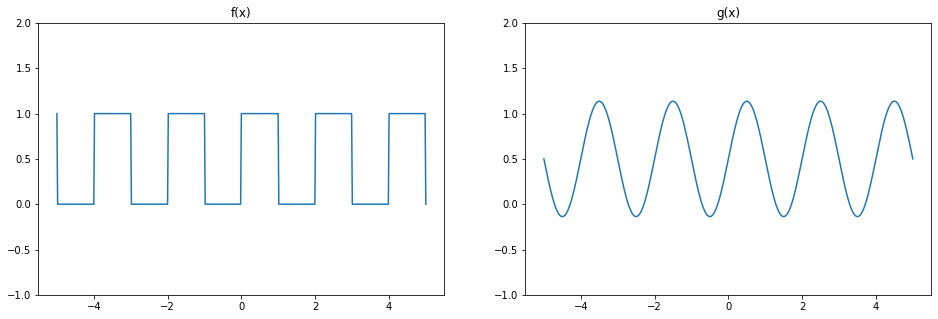

In [12]:
#Now, make the plot
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(1,2,1)  
ax2 = plt.subplot(1,2,2) 

ax1.plot(xvec,fx)
ax1.set_title('f(x)')
ax1.set_ylim(-1,2)
ax2.plot(xvec,gx2)
ax2.set_title('g(x)')
ax2.set_ylim(-1,2)

Hopefully you agree that our series representation of $f(x)$ is looking better!

So let's propose that the solutions to all of our (many) variables can be written as:

$$
\begin{align}
a_0 & = \frac{1}{P}\displaystyle\int_{0}^{P} f(t) dt \tag{1.22}\\
a_m & = \frac{2}{T}\displaystyle\int_{0}^{P} f(x) cos(\frac{2\pi m x}{P}) dx \ \ \ \ \rm{for\ m = 1,2,3...\infty} \tag{1.23}\\
b_n & = \frac{2}{T}\displaystyle\int_{0}^{P} f(x) sin(\frac{2\pi n x}{P}) dx \ \ \ \ \rm{for\ n = 1,2,3...\infty} \tag{1.24}\\
\end{align}
$$

It turns out that ALL of the a$_m$ $(>0)$ are exactly zero. We need to utilize properties of [even and odd function](https://www.mathsisfun.com/algebra/functions-odd-even.html) for $f(x)$ and thus $g(x)$.  

After adjusting for the offset $a_0$, $g(x)$ becomes an <i>odd function</i>, such that $-f(x) = f(-x)$. While cosines are necessarily <i>even functions</i> and so none of the cosine terms could contribute to $g(x)$. The same is true for the $b_n$ when $n$ is even.

We can solve the equation for this simple piecewise function ($f(x)$) to be $\frac{2}{n\pi}$ for any $n$. 
So let's add in the $b_3$ term =  $\frac{2}{3\pi}$:  
$g_{\rm 3\ terms}(x) = 0.5\ + \frac{2}{\pi}sin(\frac{2\pi x}{2}) + \frac{2}{3 \pi}sin(\frac{2 \pi 3 x}{2})$

In [13]:
gx3 = gx2 + 2/(np.pi*3)*np.sin(2*3*np.pi*xvec/2) 

(-1.0, 2.0)

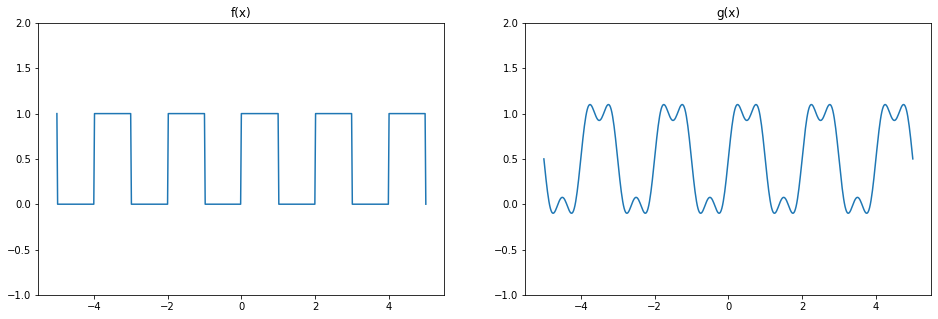

In [14]:
#Now, make the plot
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(1,2,1)  
ax2 = plt.subplot(1,2,2) 

ax1.plot(xvec,fx)
ax1.set_title('f(x)')
ax1.set_ylim(-1,2)
ax2.plot(xvec,gx3)
ax2.set_title('g(x)')
ax2.set_ylim(-1,2)

We now recongize that

1. 𝑛=0 is the constant component of the signal

2. 𝑛=1 is the <i>fundamental</i> mode corresponding to a sine/cosine wave whose period matches $f(x)$'s period exactly

3. 𝑛=2 is the first harmonic corresponding to a sine/cosine whose period matches 1/2 of $f(x)$'s period

4. 𝑛=3 is the second harmonic corresponding to a sine/cosine whose period matches 1/3 of $f(x)$’s period

And of course we can keep going.....

In [15]:
#Pick your N to sum the series to
gx_full = gx
Nmax = 55
for i in range(1,Nmax,2):
    gx_full = gx_full + 2/(np.pi*i)*np.sin(2*i*np.pi*xvec/2) 

(-1.0, 2.0)

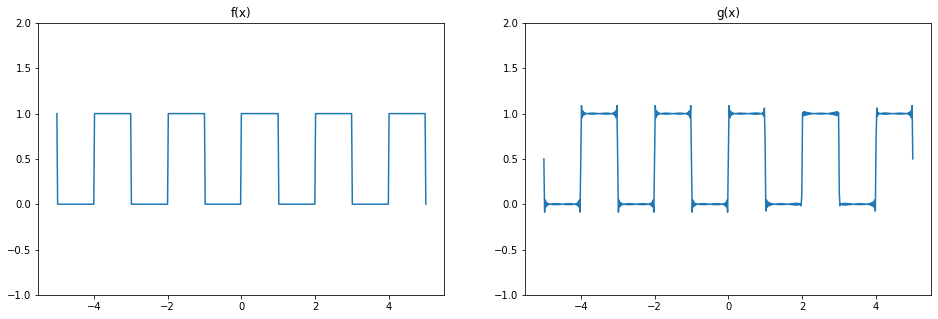

In [16]:
#Now, make the plot
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(1,2,1)  
ax2 = plt.subplot(1,2,2) 

ax1.plot(xvec,fx)
ax1.set_title('f(x)')
ax1.set_ylim(-1,2)
ax2.plot(xvec,gx_full)
ax2.set_title('g(x)')
ax2.set_ylim(-1,2)

### 
    Exercise 1.4.1  Animate a Fourier series approximation with increasing number of modes

1. Review Example 1.4.A
2. Using what you learned to make an animation which shows $g(x)$ improving as the number of $N$ terms increases.
3. Approximately, at what $N$ are you satisified that the $g(x)$ represents $f(x)$?

Check out this very enlightening [visualization](https://www.cantorsparadise.com/the-fourier-series-eee56a17c48e) of a Fourier series representation of a piece-wise constant function and an aribtrary "pseudo" periodic function.


<table><tr>
<td> <img src="https://upload.wikimedia.org/wikipedia/commons/1/1a/Fourier_series_square_wave_circles_animation.gif" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://upload.wikimedia.org/wikipedia/commons/3/37/Example_of_Fourier_Convergence.gif" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

In the above left plot, it might be easy to visualize that the first coefficient in the sine wave has the biggest contribution to recreating the function $f(x)$ (ignoring the offset contant). As we increase $n$ for the coefficient, those frequencies contribute less and less, to the point where we just stop (maybe $N=100$ is good enough). 

If you are interested in quantifying which frequencies contribute the most to the recreation of the function and $N$ in the series, you don't have to make fancy animations, just plot them up:

Text(0, 0.5, 'coefficient value')

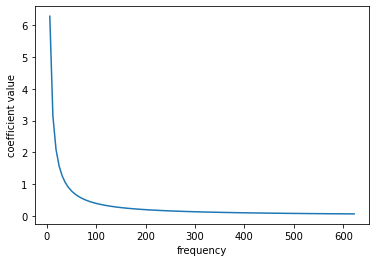

In [29]:
n = np.arange(1,100)
plt.plot(n*2*np.pi, 2*np.pi/n)
plt.xlabel('frequency')
plt.ylabel('coefficient value')

As expected, the the lowesy frequency (1) plays the biggest role in terms of describing the periodicity of the function. The high frequency terms contribute less and less as we increase in $n$ to $N=100$.

## Fourier Transforms

### 
    Description

As we discuss above, a Fourier series can represent most periodic functions as a sum of sinusoids. Each sinusoid in the series is defined so that the number of cycles in the period of the function it represents is an integer. If you have a reasonable (and periodic) function like the two examples above, this will work great. 


If the function is not periodic, you can think of it as being “periodic” with infinite period. The <i>Fourier transform</i> is an analog of the Fourier series for “periodic” functions with infinite period.

You can derive the Fourier transform in a way consistent with that intuition. You write out the Fourier series for an interval of a certain length, where that length is the period of the functions the series can represent. You assume that length goes to infinity, i.e., the period of the representable functions becomes infinite and show that this converges to the Fourier transform.

### 
    Definition

If we re-do some of the math for equation 1.20 except over the interval $[0, 2\pi]$, we get:
$$f(t) = \frac{a_0}{2\pi} + \frac{1}{\pi}\displaystyle\sum_{m} a_m cos(m t) + \frac{1}{\pi}\displaystyle\sum_{n} b_n sin(n t) $$

Let's replace $a_m$ with $F$ and $b_m$ with $F'$. Also, let's back out the constant, which means we need to do the sum from $m=0$ and $n=0$ and we can stop at $\infty$:

$$f(t) =  \frac{1}{\pi}\displaystyle\int_{m=0}^{\infty} F_m cos(m t) dt + \frac{1}{\pi}\displaystyle\int_{m=0}^{\infty} F_m' sin(m t) dt \tag{1.25} $$

In the above equation 1.25, we have just "unsimplified" things and put everything into integral form. In this representation, the Fourier Coefficients are:

$$F_m = \int f(t) cos(mt) dt\ \ \ \rm{and} \ \  \ F_m' = \int f(t) sin(mt) dt$$,

which should look familiar against equations 1.23 and 1.24.

Let's now define the following $F(m) = F_m - i F_m' $, change the integral from $-\infty$ to $\infty$, and change $m$ to be represented by $\omega = 2\pi/T = 2\pi f$. <i> We are transforming from sines and cosines to the unit circle.</i>  We arrive at the definition of the <i>Fourier transform</i>:

$$F(\omega) = \displaystyle\int_{-\infty}^{\infty} f(t) e^{-i\omega t}dt \tag{1.26}$$

We say that $f(t)$ lives in the time domain, and $F(\omega)$ lives in the frequency domain. $F(\omega)$ is just another way of looking at the corefficients of a series of waves (i.e., it is a function of frequency) which when combined correctly, recreates the function in the time domain, $f(t)$.

Don't get overwhelmed by this definition. In fact, Joseph Fourier originally did not use the Euler's formula (and therefore did not use imaginary numbers). He modified his original version using sines and cosines after realizing the elegance of the math (specifically the properties of the differential of an exponential).

To get the original function back, we use the <i> inverse Fourier transform</i>:

$$f(t) = \frac{1}{2\pi}\displaystyle\int_{-\infty}^{\infty} F(\omega) e^{i\omega t}dt \tag{1.27}$$

Note carefully the similarities and differences between the forward (eq 26) and inverse (eq 1.27) transforms. Hopefully, these look easier than what we were doing with sines and cosines prior.

Unlike the Fourier series to represent a periodic function, the Fourier transform can represent any function. 

If there <i>is</i> periodicity, it shows up in the amplitudes of the coefficients, with some frequencies being preferred over other frequencies.

As we mentioned above with the Fourier series, you can think of Fourier transform as calculating correlation between $f(t)$ and a complex exponential of each frequency $\omega$, comparing how similar they are. Complex exponentials like that have the nice quality that they can be time-shifted by multiplying them with a complex number of unit magnitude (a constant complex exponential). If the Fourier transform result at a particular frequency is a non-real complex number, then the complex exponential of that frequency can be multiplied by that complex number to get it shifted in time so that the correlation to $f(t)$ is maximized.

### 
    The Discrete Fourier Transform

In nearly all realistic cases (i.e., non trivial), to apply a Fourier Transform one must use  a <a href="https://en.wikipedia.org/wiki/Discrete_Fourier_transform">discrete Fourier transform</a>:

$$X_k = \sum_{n=0}^{N-1} x_n e^{-2\pi i k n / N} \tag{1.28}$$

Each ${\displaystyle X_{k}}$ is a complex number that encodes both amplitude and phase of a complex sinusoidal component ${\displaystyle (e^{i2\pi kn/N})}$ of function ${\displaystyle x_{n}.}$ The sinusoid's frequency is k cycles per N samples.

The inverse Fourier transform is defined as:

$$x_n = \frac 1 N \sum_{k=0}^{N-1} X_k e^{2\pi i k n / N}$$

In the above formulism, $X$ and $x$ are both series of complex numbers. $X_k$ describe the amplitudes of a series of sines and cosines in terms of frequency. The $x_n$ do the same, except in terms of time. Of course you can conduct a Fourier transform in spatial data, where we use $X_k$ to describe the amplitudes of frequency coefficients (i.e., in terms of <i>wavenumber</i>) and $x_x$ to describe the spatial coefficients.

As with with every Fourier transform routine, make sure to check the normalization and sign conventions. Note that numpy has its own version that we will also use.

### 
    Exercise 1.4.2 Calculate a discrete FFT.

1. Familiarize yourself with Python's complex math library [cmath](https://docs.python.org/3/library/cmath.html).
2. Write a function to calculate the discrete Fourier transform (eq 28).
3. Write a function to calculate the inverse discrete Fourier transform.
4. Create a complex time sampling vector that has 512 samples going from 1/512 to 1.
5. Create two vectors which are sine waves with frequency 5,  amplitude 50, 512 time steps, and with one phase-shifted by 12 time steps and the other shifted by 256 time steps. The functions should be versus <i> time </i>
6. Plot these functions versus the time sampling vector.
7. Calculate the inverse Fourier transform of your two vectors and plot. What do you do with the real and imaginary parts?


In your plot, you have a measurement in time. We use the FFT to move between time and frequency. How do we get to frequency? We need the $X_k$s via the iFFT.

Now look at the individual amplitudes by plotting the inverse FTT of your functions.

### 
    Interpreting the output of a discrete FFT

The output of the FFT includes both positive and negative frequency components. You can think of the positive and negative components as right and left going waves.
  
The ${\rm {\bf amplitude}}$ of the waves is given by the quadrature sum of the real and imaginary parts (e.g., the magnitude of the complex FFT).

The FFT index (the x axis) is not easily informative. Note that the transform itself <i>never</i> asked for or used the frequency. It only responds to the index of the data. How do we turn this index into something lime a frequency?

### 
    The Nyqyist-Shannon sampling theorem

We need to create an a frequency array in the same indexing scheme of the FFT.  We do this by identifiying the highest frequnecy that can be encoded within our array.  This is called the [Nyquist frequency]((https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem)) and is calculated as $f_{Nyquist} = 1/T_{sample}/2$, where $T_{sample}$ is the time between time samples. We will come back to this in a little bit.

The FFT can be thought of as producing a set vectors each with an amplitude and phase. <i> We want to change the reference point for a phase angle of zero, from the edge of the FFT aperture, to the center of the original input data vector.</i>

The phase (and thus the real component of the complex vector) of the result is sometimes less "jumpy" when this is done, especially if some input function is windowed such that it is discontinuous around the edges of the FFT aperture. Or if the input is symmetric around the center of the FFT aperture, the phase of the FFT result will always be zero after an fft_shift.

### 
    Exercise 1.4.3 Calculate the FFT frequency axis; Use SCIPY.

1. Calculate the Nyquist frequency for your time sample vector.
2. Create a frequency array which goes from $-f_{Nyquist} \rightarrow f_{Nyquist}$
3. Plot the frequency array versus the FFT index and interpret.
4. Plot the iFFTs versus the frequency array for both the vectore (phase-shifted by 5 and 256).
5. Interpret the figures.
6. For one of the phase-shifted vectors, take the FFT of the iFFT you calculated and compare it to your original function
7. Familiarize yourself with SCIPY's [discrete FFT library](https://docs.scipy.org/doc/scipy/tutorial/fft.html#d-discrete-fourier-transforms). What is fft.fftfreq? 
8. Re-do steps 4-6 using that library instead of your own functions.

How do we interpret these plots?

On the left, we see that the index maps the frequency from 0 to the Nyquist frequency at N/2, and. It then then rolls around to the negative frequencies through to zero.

The zero frequency is almost at the zero index, but off by 1/2, so my roll is not perfect. 

Now that we have the frequency array we can plot the FFT vs frequency and easily interpret the results.

This is a much more intrepretable results than the previous view (i.e., against the index). Note how the roll brings the peaks to the center = 0. Let's zoom in:

Now we see the issue earlier from the shift in the FFT index versus frequency. We need to fix that by shifting the index down by a 1/2. We'll let Python do that work later. 

In [46]:
from scipy import *

In [ ]:
#What do we need to define?
N = 512*1 # degrees (Number of samples)
a = 50 #float(np.random.randint(1, 100))  ## random integer (amplitude) between 0 and 100
k = 5. #float(np.random.randint(1, 50))  ## random integer (frequency) between 0 and 50
p1 = 12 #float(np.random.randint(0, 360))  ## random integer (phase) between 0 and 360
p2 = 256 #float(np.random.randint(0, 360))  ## random integer (phase) between 0 and 360

In [47]:
#Now, use the inverse FFT, since it gets us the frequency amplitudes
fouriertrans1 = fft.fft(fn1)  ## inverse FFT using our code
fouriertrans2 = fft.fft(fn2)  ## inverse FFT using our code

In [48]:
dt = t[1] - t[0]
freq = fft.fftshift(fft.fftfreq(len(t),dt)) #let fftfreq do the "roll" and shift
fft1 = fft.fftshift(fouriertrans1)
fft2 = fft.fftshift(fouriertrans2)

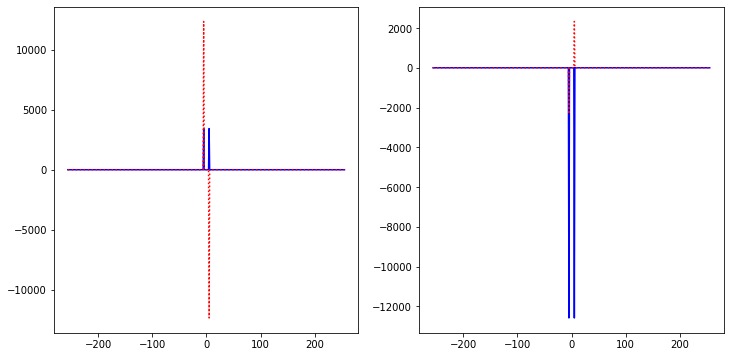

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].plot(freq,fft1.real,'b',label='real')
ax[0].plot(freq,fft1.imag,'r:',label='imaginary')
ax[1].plot(freq,fft2.real,'b',label='real')
ax[1].plot(freq,fft2.imag,'r:',label='imaginary')

Compare this to our homegrown FFT above. It should look identical (nearly).

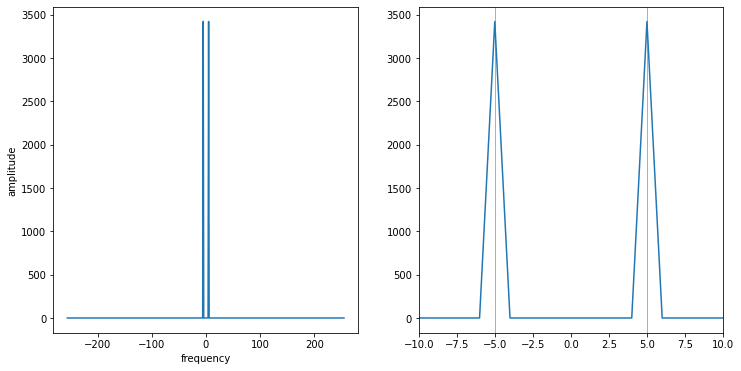

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].set_xlabel("frequency")
ax[0].set_ylabel("amplitude")
ax[0].plot(freq,fft1)
ax[1].plot(freq,fft1)
ax[1].set_xlim(-10,10)
ax[1].axvline(k,ls='-',lw=0.5)
ax[1].axvline(-k,ls='-',lw=0.5)
plt.show()

Now we recover our frequency back perfectly. <b>NOTE</b> that we have to do this operation on the UNSHIFTED result. The shifted FFT is only for display and interpretation purposes.

<Figure size 432x288 with 0 Axes>

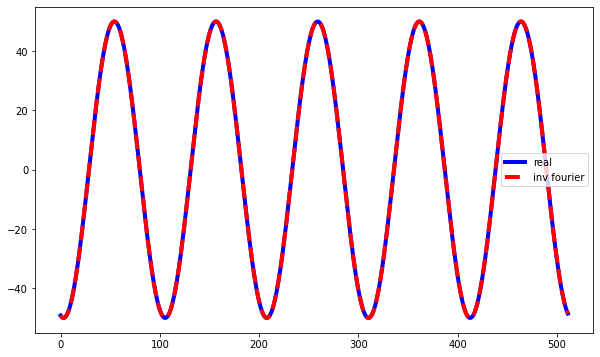

maximum difference between the results: 2.886238236725078e-14 <- this should be zero within rounding error.


In [51]:
#invert back
inv_fft2 = fft.ifft(fouriertrans2)
#ftpl = np.fft.ifft(fn1)       ## FFT using numpy code
plt.clf()
plt.figure(figsize=(10, 6))
plt.plot(fn2.real, 'b',lw=4, label='real')
plt.plot(inv_fft2, 'r--', lw=4,label='inv fourier')
plt.legend(loc='best')
plt.show()
print("maximum difference between the results:", np.max(np.abs(inv_fft2 - fn2)),
      "<- this should be zero within rounding error.")

### 
    Negative frequencies

#### 
    So what's with the negative frequencies?

Recall this figure from Exercise 1.4.1?

<table><tr>
<td> <img src="https://upload.wikimedia.org/wikipedia/commons/1/1a/Fourier_series_square_wave_circles_animation.gif" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>


Negative frequency doesn't make much sense for sinusoids, but the Fourier transform doesn't break up a signal into sinusoids, it breaks it up into complex exponentials. These are actually spirals, spinning around in the complex plane:

<img src="https://www.researchgate.net/profile/Richard-Lyons-2/publication/261779218/figure/fig2/AS:338162934140930@1457635734973/The-value-of-the-e-j2pf-o-t-complex-exponential-signal.png"></img>
<br>
Spirals can be rotating clockwise or counterclockwise, thus the concept of negative frequency. Alternatively, you can also think of it as the phase angle going forward or backward in time.

In the case of <i>real</i> signals, there are always two equal-amplitude complex exponentials, rotating in opposite directions, so that their real parts combine and imaginary parts cancel out, leaving only a real sinusoid as the result. 

<i>This is why the spectrum of a sine wave always has 2 peaks, one positive frequency and one negative</i>. Depending on the phase of the two spirals, they could cancel out, leaving a purely real sine wave, or a real cosine wave, or a purely imaginary sine wave, etc.

The negative and positive frequency components are both necessary to produce the real signal, but if you already know that it's a real signal, the other side of the spectrum doesn't provide any extra information, so it's often ignored.

### 
    Properties

The following properties of the Fourier transform become essential when interpreting the frequency components of time-domain measurements.

-  The Fourier transform $F$ of a convolution is the point-wise product of the individual Fourier transforms:
$$F(f \star g) = F(f) · F (g)$$
where here, $F$ denotes the transform.
- Fourier transforms and NOT commutative.
- the Fourier transform of a product is a convolution of the two transforms:
$$F(f · g) = F(f) \star F (g)$$


### 
    Example 1.4.B FFT of a Noisy Complicated Signal

We are next going to redo Exercise 1.4.C in the presence of noise. We will also combine two waves with different frequencies. We should be able to use the FFT to re-cover these frequencies from the noisy data.

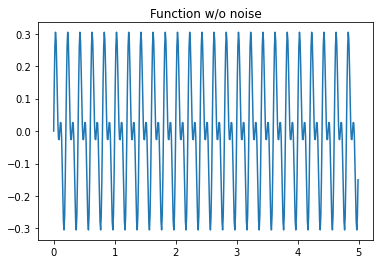

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import *

# make up a noisy signal
dt=0.01
t= np.arange(0,5,dt) #vector of times for the signal
f1,f2= 5, 10  #frequencies of 2 sine waves
n=t.size
s0=  0.2*np.sin(2*np.pi*f1*t)+ 0.15 * np.sin(2*np.pi*f2*t) #combine the series into the signal
plt.plot(t,s0)
plt.title('Function w/o noise')
plt.show()

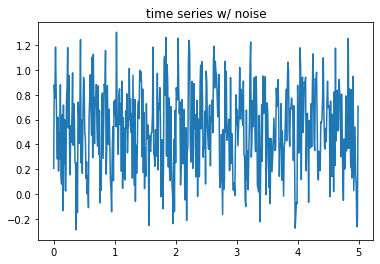

In [23]:
#Add noise. We will want to remove this later
sr= np.random.rand(np.size(t)) 
s=s0+sr
plt.plot(t,s)
plt.title('time series w/ noise')
plt.show()

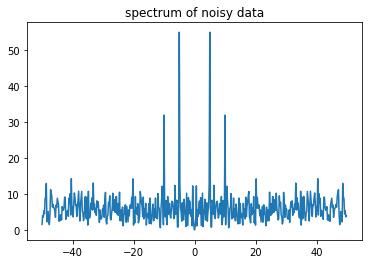

In [24]:
#Move the noisy signal to frequency space via the FFT
fn4 = s
fn4-= s.mean()  # best to always take relative to the mean
freq_fn4=fft.fftfreq(n,dt)  # see above 
fn4_freq = freq_fn4
fft_fn4=fft.fft(fn4) 
plt.plot(fft.fftshift(freq_fn4),fft.fftshift(np.abs(fft_fn4) )  )
plt.title('spectrum of noisy data')
plt.show()

### 
    Example 1.4.C Filtering a Noisy Complicated Signal

So given the noisy spectrum (FFT of the signal), can we somehow recover (or denoise) the noisy signal into its original form?

We will multiple the noise spectrum by a window function centered on the JUST locations of the peaks we see in it. This is a <b> mask </b>, which turns all other frequency values to zero in the spectrum.

In [30]:
#create a narrow bandpass filter FUNCTION (i.e., vs. the frequency of the signal) using a Gaussian. 
#The width of the gaussian (sigma) is 0.001
#Note that the gaussian filters are made already IN FREQUENCY space. 
df=0.1
gauss_p= np.exp(- ((fn4_freq-f1)/(2*df))**2)+ np.exp(- ((fn4_freq-f2)/(2*df))**2)  # pos. frequencies
gauss_m= np.exp(- ((fn4_freq+f1)/(2*df))**2)+ np.exp(- ((fn4_freq+f2)/(2*df))**2)  # neg. frequencies
g=gauss_p+gauss_m    
filtered_fft_fn4=fft_fn4*g  #Use properties of FFT to create: filtered spectrum = spectrum * bandpass 

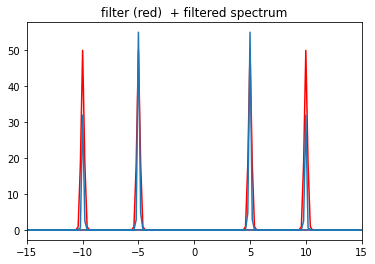

In [31]:
#Show what things look like in frequency space
plt.plot(freq_fn4,g*50, 'r')  
plt.plot(freq_fn4,np.abs(filtered_fft_fn4))
plt.title('filter (red)  + filtered spectrum')
plt.xlim(-15,15)
plt.show()

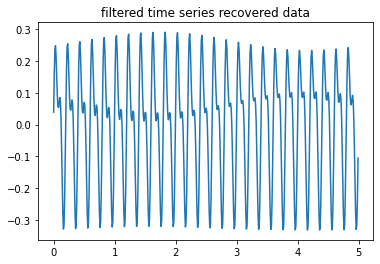

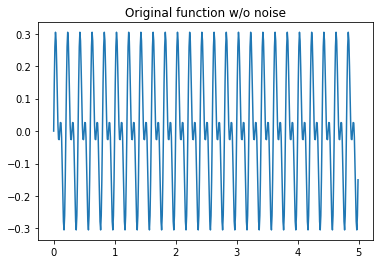

In [32]:
#Use the ifft to recover the Fourier filtered time series
s2=fft.ifft(filtered_fft_fn4)
plt.plot(t,np.real(s2))
plt.title('filtered time series recovered data')
plt.show()
plt.plot(t,s0)
plt.title('Original function w/o noise')
plt.show()

What happens as you widen the Gaussian width used to make the filter?

### 
    Exercise 1.4.4 Show that the Fourier transform of a convolution is the product of two Fourier transforms.


We use the proprties of the convolution and the FFT to create the filtered signal in fourier space.

Recall some properties of an FFT:

-  The Fourier transform $F$ of a convolution is the point-wise product of the individual Fourier transforms:
$$F(f \star g) = F(f) · F (g)$$
where here, $F$ denotes the transform.
-the Fourier transform of a product is a convolution of the two transforms:
$$F(f · g) = F(f) \star F (g)$$

1. First, convolve $g(t)$ and $f(t)$. We know what $f(t)$ is just the function we started with (called $s0$ at the start of Example 1.4.2. What is $g(t)$? How do we get it from $F(g(t))$ used in the filter the noisy spectrum?

2. Next, take the FFT of the above convolution. At this point you have done the left-hand side.
3. Now, multiple the FFT of the original dat (wihtout noise) and the FFT of the $g(t)$ (which is just the filter or mask that we defined earlier.
4. Plot and compare.

### 
    The art of frequency sampling

We have a chicken and egg problem, on top of a frequency challenge. The signal.fft does not ask anything about the time axis. It therefore requires that the time sampling be uniform. Also, what if the sampling (e.g., of a sine wave) is at or longer than the period. That would likely return a meaningless transform.

- How do we know what frequency sampling rate to use (i.e., when sampling the time series with an experiment).
- What if we cannot sample the time series data uniformly?

### 
    The reality of time sampling


We have been discussing Fourier transforms of continuous signals which are well defined for all times −∞ < t < ∞. Real-world signals only involve some finite span of time, at some finite rate of sampling (often defined by the instrument or experiment). 

The resulting data can be described by a point-wise product of the continuous signal with a
window function. For example, a continuous signal measured over a finite duration is described by a rectangular window function spanning the duration of the observation and a signal measured at regular intervals is described by a Dirac comb window function marking those measurement times.

#### 
    Example 1.4.D Windowing a signal in time

We will create a periodic signal in time. We will then create window (also in time) over which the signal was observed. We will then calculate the spectrum (i.e., FFT) of the signal and the windowed signal.

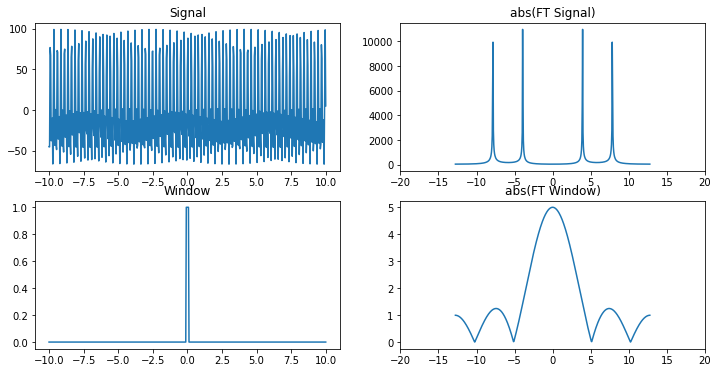

513 513


Text(0.5, 1.0, 'abs(Windowed )')

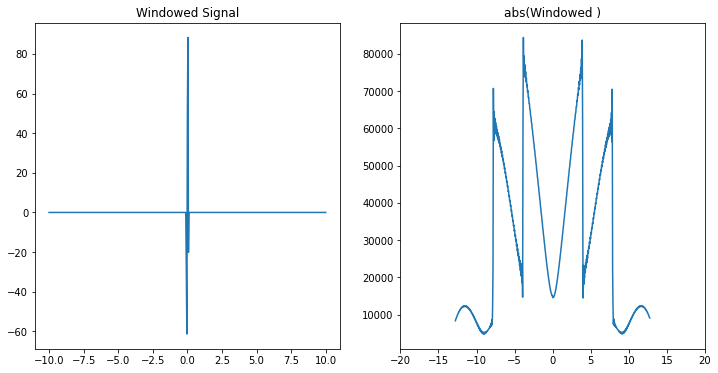

In [35]:
from scipy import signal
N = 256*1 # degrees (Number of samples)
a = 50 #float(np.random.randint(1, 100))  ## random integer (amplitude) between 0 and 100
k = 5. #float(np.random.randint(1, 50))  ## random integer (frequency) between 0 and 50
p1 = 12 #float(np.random.randint(0, 360))  ## random integer (phase) between 0 and 360
p2 = 256 #float(np.random.randint(0, 360))  ## random integer (phase) between 0 and 360
pi2 = np.pi**2.0
t = np.arange(-N,N+1, dtype=complex)/(N/10)  
## n/N becomes time, a variable from 0 to 1. Note that it is COMPLEX
fn1 = a * np.sin(pi2* k * t + p1 / 360. * pi2)   ## the pure sine wave 
fn2 = a * np.sin(pi2* k * t/2 + p2 / 360. * pi2)   ## the pure sine wave shifted in phase
g_box = np.zeros(len(t))
g_box[np.where(np.abs(t) < .1)] = 1

dt = t[1]-t[0]
fn12_fft = fft.fft(fn1+fn2)
fn12_freq = fft.fftshift(fft.fftfreq(len(t),dt)) #let fftfreq do the "roll" and shift
fn12_fftshift = fft.fftshift(fn12_fft)

g_fft = fft.fft(g_box)
g_freq = fft.fftshift(fft.fftfreq(len(t),dt)) #let fftfreq do the "roll" and shift
g_fftshift = fft.fftshift(g_fft)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
ax[0,0].plot(t, fn1+fn2)
ax[0,0].set_title('Signal')
ax[0,1].plot(fn12_freq,np.abs(fn12_fftshift))
ax[0,1].set_xlim(-20,20)
ax[0,1].set_title('abs(FT Signal)')
ax[1,0].plot(t,g_box)
ax[1,0].set_title('Window')
ax[1,1].plot(g_freq,np.abs(g_fftshift))
ax[1,1].set_xlim(-20,20)
ax[1,1].set_title('abs(FT Window)')
plt.show()

result = signal.convolve(fn12_fft,g_fft, mode='same')
print(len(result),len(g_freq))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].plot(t, (fn1+fn2)*g_box)
ax[0].set_title('Windowed Signal')
ax[1].plot(g_freq,np.abs(result))
ax[1].set_xlim(-20,20)
ax[1].set_title('abs(Windowed )')

In the above figures, we see that the initial signal is detected via the FT where we clearly see 2 delta-ish functions representing the two frequencies of the waves (like magic!).  However, when we window the signal, the convolution has the effect of replacing each delta function with a sinc function in the FT. In other words, the act of windowing spreads out the signal one would detect using the FT.

##### 
    Exercise 1.4.5


What happens to the detected signal in the observed FT as you widen or narrow the window?

#### 
    Example 1.4.E Time sampling a signal

What about sampling many times at small $\Delta$t?

We will create a signal in time. We will then sampling at certain times with a very narrow window in time.


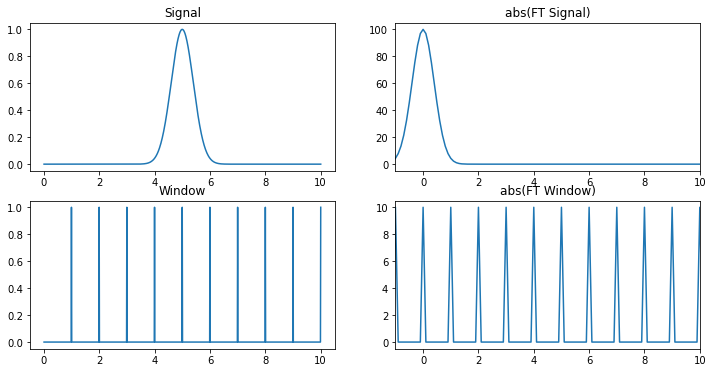

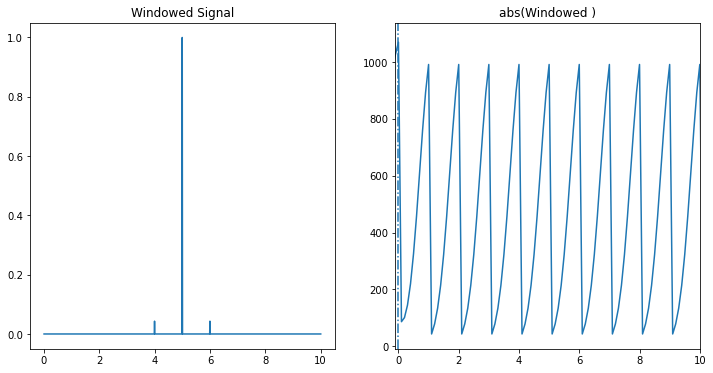

In [34]:
x = np.arange(1,1001,dtype=complex)/100
dx = x[1] - x[0]
freq = fft.fftfreq(len(x),dx) #let fftfreq do the "roll"
mu = 5
fn3 = np.exp(-np.pi*((x-mu)**2))
fn3_fft = fft.fft(fn3)
fn3_freq = fft.fftshift(fft.fftfreq(len(x),dx)) #let fftfreq do the "roll" and shift
fn3_fftshift = fft.fftshift(fn3_fft)


g_box = np.zeros(len(x))
x = np.array(x,dtype=float64)
g_comb = [1 if ii.real % 1 == 0 else 0 for ii in x]
g_fft = fft.fft(g_comb)
g_freq = fft.fftshift(fft.fftfreq(len(x),dx)) #let fftfreq do the "roll" and shift
g_fftshift = fft.fftshift(g_fft)

#print(g_fftshift)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
ax[0,0].plot(x, fn3)
ax[0,0].set_title('Signal')
ax[0,1].plot(fn1_freq,np.abs(fn3_fftshift))
ax[0,1].set_xlim(-1,10)
ax[0,1].set_title('abs(FT Signal)')
ax[1,0].plot(x,g_comb)
ax[1,0].set_title('Window')
ax[1,1].plot(g_freq,np.abs(g_fftshift))
ax[1,1].set_xlim(-1,10)
ax[1,1].set_title('abs(FT Window)')
plt.show()

result = signal.convolve(fn3_fft,g_fft, mode='same')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].plot(x, (fn1)*g_comb)
ax[0].set_title('Windowed Signal')
ax[1].plot(g_freq,np.abs(result))
ax[1].set_xlim(-0.1,10)
ax[1].set_title('abs(Windowed )')
ax[1].axvline(0,linestyle='-.')

Interestingly, because the Fourier transform of a Dirac comb is another Dirac comb, the effect of such an observing window is to create a long sequence of aliases of the underlying transform with a spacing of 1/T.

The following issues are almost always unavoidable in Fourier analyses of windowed data (and when is data not windowed?):

- the spectrum of the signal that we <i> expected</i> to see turns into a lot of separate (periodic) peaks in the FT of the convolved window and signal.
- the spectrum of the observed (windowed) series is wider as the filter gets narrower.

How do we deal with these? Play with the window in such a way that you windowed signal is not corrupted (chicken and egg). Examine the ifft of the recovered undelying signal after the FFT analysis and try to make physical sense of what you are seeing. You can rule out peaks that do not fit your physical model.

# 5. Power

### 
    Example 1.5.A

In signal processing, we normally use the term "power spectra density" (PSD) as the absolute value of the FT.

In the simple example we have been using of a sine wave with a single frequency, we can plot the "power" by simply taking the absolute value of the Fourier transform of fn1:

Text(0, 0.5, 'PSD')

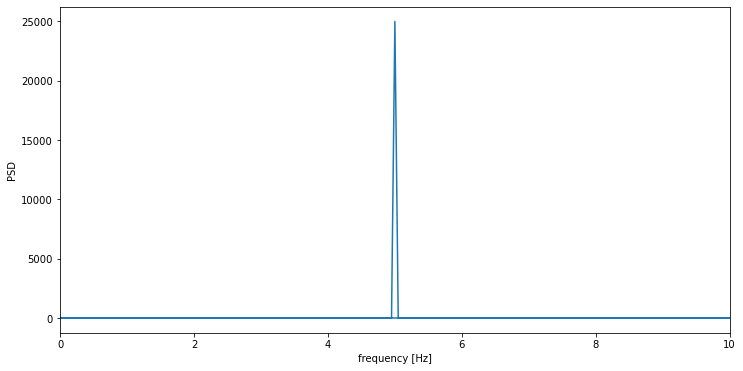

In [57]:
N = 512*1 # degrees (Number of samples)
a = 50 #float(np.random.randint(1, 100))  ## random integer (amplitude) between 0 and 100
k = 5. #float(np.random.randint(1, 50))  ## random integer (frequency) between 0 and 50
p1 = 12 #float(np.random.randint(0, 360))  ## random integer (phase) between 0 and 360
p2 = 256 #float(np.random.randint(0, 360))  ## random integer (phase) between 0 and 360t = np.arange(-N,N, dtype=complex)/(N/10)  ## n/N becomes time, a variable from 0 to 1. Note that it is COMPLEX
fn1 = a * np.sin(2*np.pi* k * t + p1 / 360. * 2*np.pi)   ## the pure sine wave 
dt = t[1] - t[0]
fn1_fft = fft.fft(fn1)
fn1_fftshift = fft.fftshift(fn1_fft)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax.plot(fft.fftfreq(len(t),dt), np.abs(fn1_fft)) #Note that I am NOT rolling/shifting the frequency for PSD. 
ax.set_xlim(0,10)
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD')

Not so interesting, and yes, it looks like the FTT. So why do we care about power?

## Definition

Recall from above that the (auto)covariance is the numerator of the (auto)correlation. The (auto)correlation is the (auto)covariance divided by the variance.

Suppose that $\gamma(t)$ is the autocovariance function of a stationary process and that $f(\omega)$ is the spectral density for the same process. In the notation of the previous sentence, $\tau$ = time lag and $\omega$ = frequency.

We write:
$$\gamma(\tau) = <E^*(t+\tau)E(t)> $$

We define the <i> spectrum </i> of $x$ (at some or many frequencies) as the (inverse) Fourier transform of $\gamma(h)$:

$$
S(\omega) = \displaystyle\sum_{\tau=-\infty}^{\infty} e^{-i\omega \tau} \gamma(\tau) \tag{1.29}
$$

<i>We define the power spectrum to be the Fourier transform of the  autocovariance</i>. 

This provides a physically meaningful intepretation of the power: when the power at some frequency is large, the variance (about the mean) in the time series from that frequency is large and that frequency contributes significantly to the time series. When the power is small, the variance about the mean is small and that frequency does not contribute as much.

At $\omega = 0$, we see that:

$$
\displaystyle\sum_{\tau=-\infty}^{\infty} \gamma(\tau) = S(0) 
$$
or that the sum of the autocovariance is just equal to the power at frequency zero.

If one uses Euler's relation, you can rewrite the power as

$$
S(\omega) =\gamma(0) + \displaystyle\sum_{\tau=1}^{\infty} cos(\omega \tau) \gamma(\tau) \tag{1.30}
$$
and note that we bring out $\tau=0$.

By symmetry in cosine and $\gamma(\tau)$, you find that for spectral analysis, we only need
to find the spectrum for $\omega =-\pi \le \pi$. 

The covariance and spectral density are Fourier transform pairs. This means that just like we could look at zero frequency (e.g. in equation 1.30), we can also look at zero lag (which is the variance):

$$\gamma(0) = \displaystyle\sum_{\omega = -\pi}^{\pi} S(\omega)$$

This means that the variance of the time series is the sum of the power. The “total” integrated spectrum equals the variance of the time series. 

Note on limits: $\tau$ (which here is the lag, in time), goes to infinity. It might start at -infinity or zero, depending on how you express the transform, deal with roll, etc. The <i> spectrum </i> goes from $-\pi$ to $<\pi$ due to the symmetry mentioned above. In terms of power, you only care about zero to $\pi$.

## Spectral density

In the above math, we started with the covariance of the time series. If we normalize this properly, we will have the autocorrelation function as opposed to the covariance function:

$$
f(\omega) = \displaystyle\sum_{h=-\infty}^{\infty} e^{-i\omega h} \rho(h)
$$
where $\rho$ is the autocorrelation of the time series. This has a nice property, which is that at lag $h=0$, we know the value of the correlation: it has to be one:

$$1 =  \displaystyle\sum_{h=-\infty}^{\infty} \rho(h) $$

or 

$$1 =  \displaystyle\int_{\omega=-\pi}^{\pi} f(\omega) d\omega$$

In this sense, $f(\omega)$ is normalized to one (like a probablility), so it is termed the <i> power spectral density.</i>

## Weiner-Kinchin Theorem

The Fourier transform of an autocorrelation at is equal to the power spectrum:

$$(f \otimes f)(\tau) = F(w)\ F(w) = |F(w)|^2 \tag{1.31}$$

### 
    Exercise 1.5.1 Show that the power spectrum has a peak at zero lag.

We start with the Cauchy-Sshwarz inequality (see eq 1.8 in Expectations and Moments in 1.1):

$$\left|\int_{-\infty}^{\infty}g_1(t)g_2(t) dt\right|^2 \leq \int_{-\infty}^{\infty}|g_1(t)|^2 dt \int_{-\infty}^{\infty}|g_2(t)|^2 dt$$

Next, express this as an autocorrelation function. Let's $g_1(t) \rightarrow f(t)$ and $g_2(t) \rightarrow f(t-\tau)$
$$\left|\int_{-\infty}^{\infty}f(t)f(t-\tau) dt\right|^2 \leq \int_{-\infty}^{\infty}|f(t)|^2 dt \int_{-\infty}^{\infty}|f(t-\tau)|^2 dt$$

Let $u=t-\tau$ in the second integral on the right-hand side:
$$\left|\int_{-\infty}^{\infty}f(t)f(t-\tau) dt\right|^2 \leq \int_{-\infty}^{\infty}|f(t)|^2 dt \int_{-\infty}^{\infty}|f(u)|^2 du$$

Change back to from $u$ to $t$ in that same integral:
$$\left|\int_{-\infty}^{\infty}f(t)f(t-\tau) dt\right|^2 \leq \int_{-\infty}^{\infty}|f(t)|^2 dt \int_{-\infty}^{\infty}|f(t)|^2 dt$$

We notice now that the right-hand side is the autocorrelation function for zero lag: $\int_{-\infty}^{\infty}|f(t)|^2 dt= R_{f}(\tau = 0)$. Finally, take the square root:

$$\int_{-\infty}^{\infty}f(t)f(t-\tau) dt \leq R_{f}(0)$$



## Parselval's Theorem

It should be intuitive that the total energy of a function is the same where

$$\mathrm{ \mathit{E\mathrm{=}\int_{-\infty }^{\infty }\left | f\left ( t \right ) \right |^{\mathrm{2}}dt\mathrm{=}\frac{\mathrm{1}}{\mathrm{2}\pi }\int_{-\infty }^{\infty }\left | F\left ( \omega \right ) \right |^{\mathrm{2}}d\omega}} \tag{1.32}$$

Note that this <i>only</i> holds for a fuction that has <i> finite</i> energy. What about a periodic function?

### 
    Exercise 1.5.1 Use SCIPY to plot some periodograms

MATPLOTLIB has built-in functions to analyze FTs and SCIPY has multiple ways to estimate the power spectral density.

1. Familiarize yourself with signal.periodogram and signal.welch.
2. Create a single frequency signal and plot the power spectral density using the above two libraries.

## PSDs when time series has uneven sampling

Reality is, many time series are not sampled uniformly.

### 
    Example 1.5.B Find the period of Kepler-6 from the Kepler Lightcurve.

We will utilize the [Lightkurve](https://docs.lightkurve.org/) library to access the data. We will then use some astropy tools to analyze the light curve.

#### 
    First, we will install the package.

In [67]:
import sys
!{sys.executable} -m pip install --user lightkurve

     |████████████████████████████████| 265 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 5.8 MB/s  eta 0:00:01
  Using cached fbpca-1.0.tar.gz (11 kB)
  Using cached oktopus-0.1.2.tar.gz (10 kB)
  Using cached memoization-0.4.0.tar.gz (41 kB)
     |████████████████████████████████| 49 kB 1.3 MB/s  eta 0:00:01
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11375 sha256=622737498b4a76996f3a01e20dfbdc747245598b5df30c7dff12a93545302433
  Stored in directory: /home/christoq/.cache/pip/wheels/f5/60/60/28df6c25f4d22b73d1a2b1c7e4842a5e2178e35e47b62e8e9a
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50451 sha256=b58a5cf63e968e916c7a84ebbf5a29b66eff4e6363c7da1f84081dcba49759e0
  Stored in directory: /home/christoq/.cache/pip/wheels/a7/cb/f2/25802a0599b033b24cbf2cb0210af6f13c27291db92cd5178c
  Created wheel for oktopus: filename=oktopus-0.1.2-py3-none-any.whl size=12763 sha256=10ced54564c2731fc905fd37d1bc7fc641f0615

#### 
    Next, we get some data and plot it. ALWAYS LOOK AT YOUR DATA.

/home/christoq/.local/lib/python3.9/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/christoq/.lightkurve/cache. Please move all the files in the legacy directory /home/christoq/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(
/home/christoq/.local/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


       time             flux      ...   pos_corr1      pos_corr2   
                    electron / s  ...      pix            pix      
------------------ -------------- ... -------------- --------------
131.51178135778173  7.3603977e+04 ...  1.0303581e-03 -1.9799426e-02
131.53221582827246  7.3619930e+04 ...  9.5298892e-04 -1.9902917e-02
 131.5526501987697  7.3624562e+04 ...  1.0843917e-03 -2.0035187e-02
 131.5730844693171  7.3640406e+04 ...  1.3153800e-03 -1.9962542e-02
131.59351883981435  7.3624023e+04 ...  5.8365392e-04 -2.0055704e-02
131.61395331031235  7.3623336e+04 ...  6.6329073e-04 -1.9884914e-02
131.63438758080883  7.3620695e+04 ...  7.7925890e-04 -1.9759389e-02
 131.6548219512988  7.3627742e+04 ...  5.1554275e-04 -1.9736614e-02
 131.6752564217968  7.3632039e+04 ...  5.4768758e-04 -1.9733533e-02
131.69569079228677  7.3623266e+04 ...  2.9507378e-04 -1.9749023e-02
               ...            ... ...            ...            ...
 164.7993004655582  7.3621938e+04 ... -3.6526462

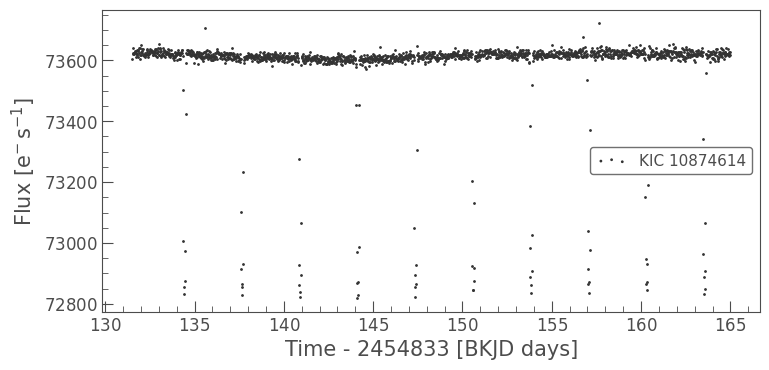

In [68]:
import lightkurve as lk
light_curve = lk.search_lightcurve("Kepler-6", quarter=1).download()
light_curve.scatter()
print(light_curve)
time = light_curve['time']
flux = light_curve['flux']

Uh oh, these data are <b> not </b> sampled on an even frequency! 

#### 
    ASTROPY's Lomb-Scargle PSD estimator

Use the Lomb-Scargle or Boxed Least Squares PSD estimators for the PSD. These are tools designed for uneven sampling.

The Lomb–Scargle periodogram is perhaps the best-known technique to compute periodicity of unequally spaced data in astronomy. We do not have time to go into details, but it is similar to using a least squares technique to statistically infer the PSD. Feel free to peruse [this page](https://exoplanetarchive.ipac.caltech.edu/docs/pgram/pgram_algo.html).

The periodogram is an estimator of the spectral density, the Fourier transform of the autocovariance function.

In [62]:
import matplotlib   # plotting libraries  
import matplotlib.pyplot as plt   # plotting libraries  
import cmath as cm  # complex math
import numpy as np  # numerical routines 
%matplotlib inline  
#Whenever we take the absolute value of the FFT, we will get warnings about losing the imaginary part. Sooo
import warnings
warnings.filterwarnings('ignore')
from scipy import *
from scipy import signal


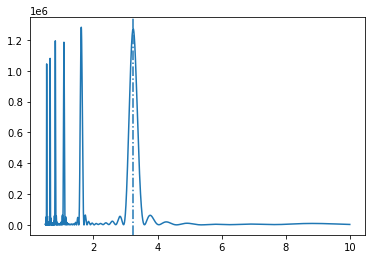

In [63]:

nonnan = ~np.isnan(flux.value)
keep = np.where(nonnan == True)[0]
flux1 = np.array(flux[keep])
time1 = np.array(time.value[keep])
time1 = np.asarray(time1, dtype=np.float64)
#print(flux1.value, time1)
periods=np.arange(0.5, 10, 0.0001)
result = signal.lombscargle(time1,flux1-np.mean(flux1),2*pi/periods)#Note requires data to be centered on mean!
plt.plot(periods,result)
plt.axvline(3.23,linestyle='-.')
#plt.xlim(0,1)
plt.show()

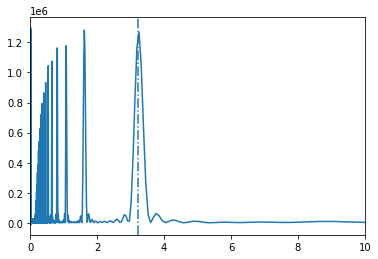

In [64]:
from astropy.timeseries import LombScargle
frequency, power = LombScargle(time1, flux1,normalization='psd').autopower()
plt.plot(1/frequency,power)
plt.xlim(0,10)
plt.axvline(3.23,linestyle='-.')

Let's take the one at 3.23 as the planet. What are those other frequencies?

#### 
    Lightkurves Boxed Least Squares estimator

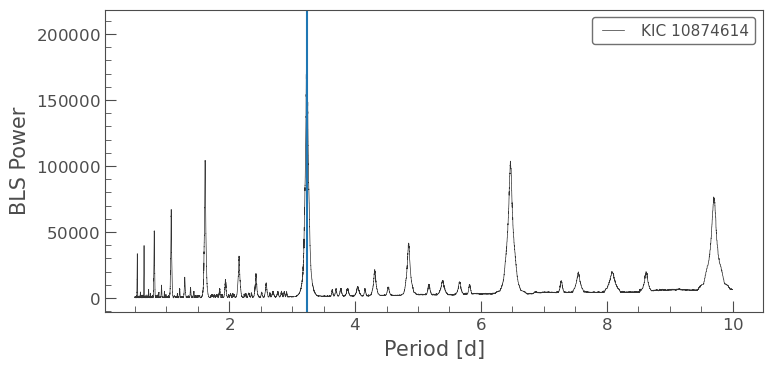

In [68]:
periodogram = light_curve.to_periodogram(method="bls", period=np.arange(0.5, 10, 0.0001))
periodogram.plot()
plt.axvline(3.23)

#### 
    Folding a time series

In [65]:
k6b_period = 3.23
T0 = time1[0]+1.2#the offset is TBD

In [66]:
phase = (time1 - T0)/k6b_period - np.floor((time1-T0)/k6b_period)

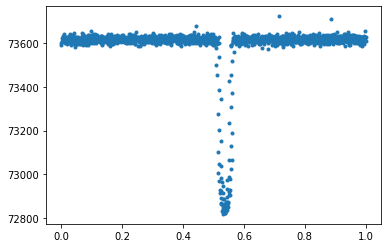

In [67]:
plt.plot(phase,flux1,'.')

#### 
    Final thoughts on real-world time-series analyses

Real data is messy. Often, the data (or the spectrum) is smoothed, "pre-whitened+, filtered, and otherwise manipulated in order to make sense in a Fourier-like analysis.

"It is extremely difficult to derive the significance of a weak periodicity from harmonic analysis. Do not believe analytical estimates (e.g. exponential probability), as they rarely apply to real data. It is essential to make simulations, typically permuting or bootstrapping the data keeping the observing times fixed. Simulations of the final model with the observation times is also advised." -- Eric Feigelson.